In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from collections import OrderedDict

In [2]:
%load_ext watermark
%watermark -u -d -p numpy,pandas,matplotlib,sklearn

last updated: 2020-06-10 

numpy 1.18.1
pandas 1.0.1
matplotlib 3.1.3
sklearn 0.22.1


**NOTE** 코딩해야할 부분을 제외하고는 수정하지 마세요.

# DATA LOAD

In [3]:
mnist_sci = fetch_openml('mnist_784')

In [4]:
x_train, x_test, y_train_, y_test_ = train_test_split(mnist_sci.data, mnist_sci.target, 
                                                    test_size = 0.1,
                                                   shuffle = True)
x_train /= 255.0
x_test /= 255.0

def one_hoy_label(X):
    T = np.zeros((X.size, 10))    
    for idx, row in enumerate(T):
        row[int(X[idx])] = 1
        
    return T

y_train = one_hoy_label(y_train_)
y_test = one_hoy_label(y_test_)

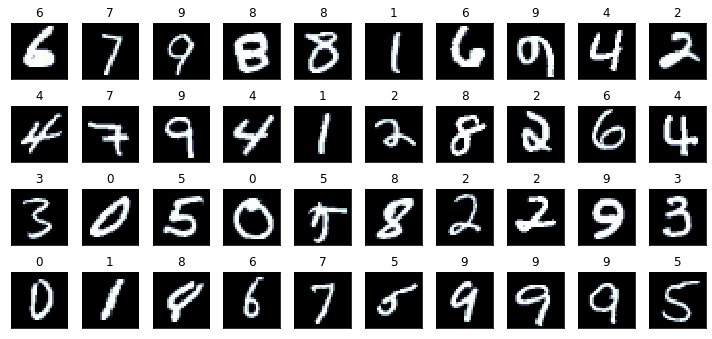

In [5]:
N = 4
M = 10
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i*M+j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(x_train[k].reshape(28,28), cmap=plt.cm.bone, interpolation="none")
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(y_train_[k])
plt.tight_layout()
plt.show()

## functions

In [6]:
class Softmax_CE:
    """
    편의를 위해서 softmax와 crossenropy를 결합한 것입니다.
    """
    def __init__(self):
        self.loss = None # 손실함수
        self.y = None    # softmax의 출력
        self.t = None    # 정답 레이블(원-핫 인코딩 형태)
        
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = CE_loss(self.y, self.t)
        
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size

        return dx

In [7]:
def softmax(x):
    
    ######################################################################
    # 문제 1-1 softmax 함수를 구현하세요                                 #
    ######################################################################
    #y = np.array([])
    x = x.T
    x = x - np.max(x,axis=0) #softmax 함수에서는 그냥 x를 돌리면 지수함수로 결과가 있기 때문에
    #값이 많이 커져서 overflow문제가 생기게 된다. 따라서 x의 max값을 빼줘서 계산을 진행한다. softmax의 결과는 변하지 않는다.
    y = np.exp(x) / np.sum(np.exp(x),axis = 0)
    #print(x)
    #exp_x = np.exp(x)
    #exp_sum = np.sum(exp_x)
    
    #for a in exp_x:
    #    temp = a / exp_sum
    #    print(temp)
    #    y = np.append(y,temp)
    
    ######################################################################
    #                          END OF YOUR CODE                          #
    ######################################################################
    
    return y.T 

$$ CE = \frac{1}{N_{batch}} \sum(log(y, t))$$ 

In [8]:
#def CE_loss(y, t):
    
    ######################################################################
    # 문제 1-2 cross entropy 함수를 구현하세요.                               
    # y 값의 경우 예측한 값, t값의 경우 true label 값입니다.    
    # batch 로 데이터가 들어온다는 것을 유의 하세요.
    ######################################################################
#    value = 0
#    res = 0
#    for a,b in zip(y,t):     #cross entropy에서의 합 값( average는 아님 )
#        value = np.log10(a)*b
#        res += value
#    res *= -1
#    
#    return res

    ######################################################################
    #                          END OF YOUR CODE                          #
    ######################################################################

In [9]:
def CE_loss(y, t):
    
    ######################################################################
    # 문제 1-2 cross entropy 함수를 구현하세요.                               
    # y 값의 경우 예측한 값, t값의 경우 true label 값입니다.    
    # batch 로 데이터가 들어온다는 것을 유의 하세요.
    ######################################################################
    if y.ndim == 1:    #1차원일 경우
        t = t.reshape(1, t.size)   #1차원 배열로 원래는 ( , n) 꼴이므로
        y = y.reshape(1, y.size)
        
    # train 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    # 어차피 곱할것이므로 0인 값은 버리는 느낌으로 1일 때의 값으로 반환한다는 말
    if t.size == y.size:
        t = t.argmax(axis=1) 
             
    batch_size = y.shape[0]    #다 적용 한것을 average해야 하므로 batch size로 나눠줘야 하므로 batch size 구함
    return -np.sum(np.log10(y[np.arange(batch_size), t])) / batch_size  #cross entropy의 정의에 따른 수식
    

    ######################################################################
    #                          END OF YOUR CODE                          #
    ######################################################################

In [10]:
#test 하는 부분
y = np.array([0.3,0.3,0.4])#,[0.3,0.4,0.3],[0.1,0.2,0.7]])
t = np.array([0,0,1])#,[0,1,0],[1,0,0]])
CE_loss(y,t)

0.3979400086720376

In [11]:
class Relu:
    ######################################################################
    # 문제 1-3 Rely layer 를 구현하세요                                  #
    # 출력값이 0이 되는 부분과 아닌 부분에 대해서 잘 생각해보세요        #
    ######################################################################
    
    # masking을 해보세요
    def __init__(self):
        self.mask = None  #mask 초기화
    
    def forward(self, x):   #forward는 순방향 진행( 학습 시키는 과정)
        self.mask = (x<=0)   #mask 설정
        out = x.copy()  #x값 변경해야 하므로 out에다가 copy
        #print(self.mask) 
        out[self.mask] = 0  #bool 연산 , out에서 true인 값을 0으로 설정 나머지는 그대로 진행
        
        return out
    
    # 항등항수의 미분은 자기 자신입니다. 
    def backward(self, dout):   #backward는 역방향 진행(back propagation 단계)
        dout[self.mask] = 0   #bp에서 마찬가지로 mask를 거쳐서 x가 0보다 작거나 같으면 전에 온 dout에 0을 곱함
        dx = dout  #나머지는 그대로 가져감
        return dx
    
    ######################################################################
    #                          END OF YOUR CODE                          #
    ######################################################################

In [12]:
a = Relu()
x = np.array([-1,2,-3,4,-5])
a.forward(x)
print(a.backward(x))

[0 2 0 4 0]


In [13]:
class FClayer:
    ######################################################################
    # 문제 1-4 fully connecter layer 를 완성하세요                       #
    # 행렬의 곱셈에 대한 backward를 신중히 구현하세요                    #
    ######################################################################
    def __init__(self, W, b):
        
        self.W = W
        self.b = b
        
        self.x = None
        
        # backward 를 위해서 shape을 변경할 수가 있어서 원래의 shape 저장
        self.original_x_shape = None
        
        # 가중치와 편향 매개변수의 미분
        self.dW = None
        self.db = None

    def forward(self, x):
        # 본인이 구현한 입력 이미지의 shape 에 따라서 조정을 해줄수도 있습니다. 
        self.original_x_shape = x.shape
        
        x = x.reshape(x.shape[0], -1)
        
        self.x = x

        out = np.dot(self.x, self.W) + self.b  #우리가 기존에 알던 W.T * x와 x.T*W가 같다.
        # reshape을 x기준으로 진행했기 때문에 위와 같이 작성

        return out
    
    # 1차원 함수의 곱셈에 대해서 생각해보고 그것을 확장하세요 
    # 항상 데이터의 shape에 주의 하세요
    def backward(self, dout):      # 보고서에 이 부분 중요하게 작성 필요(매우 중요!!)

        dx = np.dot(dout, self.W.T)  
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        dx = dx.reshape(*self.original_x_shape) # asterisk 사용함으로써 원래의 shape를 그대로 적용시키는 것 
                                                # (괄호 풀고 그대로 안으로 사용된다고 생각)
        
        return dx
    
    ######################################################################
    #                          END OF YOUR CODE                          #
    ######################################################################

#### 이번 과제의 네트워크의 구조는 1개의 히든 레이어를 가진 네트워크 입니다.
#### 활성함수로는 Relu 를 사용하세요 

In [14]:
class DNN:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        # 가중치 초기화
        self.params = {}
        
        ######################################################################
        # 문제 1-5 파라미터 초기화를 적용하세요                              #
        # 최소한 85% 이상의 test acc가 나올수 있도록 하세요                  #
        # 수업시간에 배운 초기화 방법이 성능이 보통 좋습니다. 
        # 파라미터의 shape에 대해 잘 생각해보세요
        ######################################################################
        
        #가중치 초기화 계수를 주어졌기 때문에 그대로 사용 하되 random하게 숫자 생성
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size) # 첫 layer에서는 input과 hidden 사이
        self.params['b1'] = np.zeros(hidden_size)  # bias는 hidden_size에 맞게 0으로 초기화
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) # W2 는 hidden과 output 사이
        self.params['b2'] = np.zeros(output_size)  # 마찬가지로 bias는 output_size에 맞게 0으로 초기화

        ######################################################################
        #                          END OF YOUR CODE                          #
        ######################################################################

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['FClayer1'] = FClayer(self.params['W1'], self.params['b1']) 
        self.layers['Relu1'] = Relu()
        self.layers['FClayer2'] = FClayer(self.params['W2'], self.params['b2'])

        self.lastLayer = Softmax_CE()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)        
        return x
        
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
       
    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['FClayer1'].dW, self.layers['FClayer1'].db
        grads['W2'], grads['b2'] = self.layers['FClayer2'].dW, self.layers['FClayer2'].db

        return grads


In [15]:
######################################################################
# 문제 1-6 구현한 것을 바탕으로 최종적으로 학습해보세요              #
# 최소한 85% 이상의 test acc가 나올수 있도록 하세요                  #
# 보고서에 print 값과 그래프를 제출하세요                            #
######################################################################

network = DNN(input_size=784, hidden_size=50, output_size=10)

train_size = x_train.shape[0]
batch_size = 100   
learning_rate = 0.1

train_acc_list = []
test_acc_list = []
epochs = 10
step = int(train_size / batch_size)

print('{:<5}\t{:<10}'.format('epoch', 'test acc'))
for epoch in range(epochs):
    for batch_idx in range(step):
        x_batch = x_train[batch_idx*batch_size:batch_idx*batch_size+batch_size]
        y_batch = y_train[batch_idx*batch_size:batch_idx*batch_size+batch_size]
        
        grad = network.gradient(x_batch,y_batch)


        # 매개변수 갱신
        for key in ('W1', 'b1', 'W2', 'b2'):
            network.params[key] -= learning_rate * grad[key]

        # 학습 경과 기록
        loss = network.loss(x_batch,y_batch)


    train_acc = network.accuracy(x_train,y_train)
    test_acc = network.accuracy(x_test,y_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print('{:5}\t{:.4f}'.format(epoch, test_acc))

x = np.arange(len(train_acc_list))
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

epoch	test acc  
[[-1.00239691e-02 -4.43105702e-03 -6.12493028e-03 -1.64104447e-02
  -8.08297269e-03 -1.73444508e-03 -1.34405971e-02 -4.60665049e-03
  -7.31051155e-03 -1.22589294e-02 -7.07562709e-03 -7.58547587e-03
  -6.65140301e-03 -3.14426453e-03 -2.29375712e-03 -4.31428332e-03
  -8.49911213e-03 -1.26248318e-02 -1.06704479e-03 -7.15032186e-03
  -1.57522128e-02 -1.75574695e-02 -1.24121397e-02 -1.03077367e-02
  -9.17161197e-03 -1.91710669e-02 -8.39674138e-04 -4.03112965e-03
  -2.01092780e-02 -1.19742020e-02 -1.82279742e-02 -9.82202768e-03
  -1.31504870e-02 -4.66563086e-03 -5.63807162e-03 -1.80795270e-03
  -8.98482541e-03 -7.62073697e-03 -3.52440766e-03 -4.27828944e-03
  -1.21702457e-02 -8.75327796e-03 -6.78960753e-03 -7.24347961e-03
  -9.43359393e-03 -8.81316376e-03 -5.18250780e-03 -8.75519319e-03
  -4.15260461e-03 -1.30140058e-03 -5.03245423e-03 -6.54176358e-03
  -4.38466157e-03 -4.87684177e-03 -1.10310417e-02 -2.44672712e-03
  -1.08392470e-02 -1.12110372e-02 -1.20919547e-02 -5.981260

[[-8.84152876e-03 -4.05463597e-03 -8.02144016e-03 -1.43922454e-02
  -6.73713520e-03 -8.66039153e-04 -1.32804978e-02 -3.43674202e-03
  -7.80821701e-03 -1.17472122e-02 -6.64652207e-03 -8.54039267e-03
  -6.00760033e-03 -3.42765728e-03 -1.12357887e-03 -4.97585914e-03
  -7.24140255e-03 -1.22868834e-02 -1.50917289e-03 -8.04150599e-03
  -1.60225311e-02 -1.52876369e-02 -1.07932665e-02 -8.29165236e-03
  -8.43529766e-03 -1.77720333e-02 -1.55904532e-03 -3.92178389e-03
  -1.81091164e-02 -1.20765519e-02 -1.66221357e-02 -1.03683155e-02
  -1.20426652e-02 -4.02806147e-03 -4.91889910e-03 -1.62714906e-03
  -8.35640972e-03 -6.33029706e-03 -3.07054603e-03 -3.44426503e-03
  -1.04150538e-02 -7.79917986e-03 -5.63901802e-03 -6.80869751e-03
  -9.71220571e-03 -8.95219286e-03 -4.42019896e-03 -8.50907636e-03
  -4.05320309e-03 -1.23847777e-03 -4.42047080e-03 -6.17043500e-03
  -4.39085679e-03 -5.47422039e-03 -9.49784866e-03 -1.62578446e-03
  -9.80264749e-03 -1.01760058e-02 -9.98092404e-03 -5.55533395e-03
  -6.72296

[[-4.45717758e-03  0.00000000e+00 -5.50651667e-03 -5.47276222e-03
   0.00000000e+00  0.00000000e+00 -1.76939305e-03 -2.81641954e-03
  -7.76252068e-03 -2.70739383e-03 -3.10307267e-03  0.00000000e+00
  -8.78501856e-04  0.00000000e+00  0.00000000e+00 -3.14850667e-03
  -3.93288624e-03 -7.28450004e-03  0.00000000e+00 -8.64064828e-03
  -1.68759889e-03  0.00000000e+00 -2.08576273e-03 -8.42223650e-03
  -2.02440994e-03  0.00000000e+00 -3.43979942e-03 -5.77697594e-03
  -1.26816523e-03 -2.58019129e-03  0.00000000e+00 -7.05631161e-03
  -2.69113700e-03 -6.48279299e-03 -5.21072399e-04  0.00000000e+00
  -3.97990198e-03 -8.72496884e-03 -1.85378445e-03 -5.98789364e-03
  -2.34780994e-03 -4.38752494e-03 -5.94717859e-03  0.00000000e+00
  -4.26400610e-03  0.00000000e+00  0.00000000e+00 -3.76946627e-04
  -4.72641389e-03  0.00000000e+00  0.00000000e+00 -5.49304058e-03
  -1.91590438e-04 -1.99327143e-03  0.00000000e+00 -2.66927965e-03
   0.00000000e+00  0.00000000e+00 -7.03795145e-03  0.00000000e+00
   0.00000

[[ 0.00000000e+00 -3.03573078e-03  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -3.34973647e-03  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -3.38959825e-03 -8.58877815e-04  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -9.81840247e-05  0.00000000e+00
   0.00000000e+00 -6.26829789e-04  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.95918711e-03  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -9.00197988e-04  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -2.14443996e-03  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -9.41123670e-04
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -2.93028789e-03  0.00000000e+00  0.00000000e+00
  -6.67263

[[ 0.00000000e+00  0.00000000e+00 -6.86627515e-03 -8.04205935e-05
  -1.33951803e-03 -1.98510253e-03 -2.38808277e-03  0.00000000e+00
  -3.73486338e-04 -2.06703994e-04 -3.34861809e-03 -1.89948463e-03
  -2.64033197e-03 -4.84863352e-03 -1.08187968e-04 -3.24872089e-03
  -6.11353406e-04 -6.89124278e-03 -4.61357344e-03  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.43542485e-03
  -4.61278712e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -2.07827354e-03 -5.44833005e-03  0.00000000e+00 -1.26906776e-02
   0.00000000e+00 -3.28421326e-03 -5.44533098e-04  0.00000000e+00
   0.00000000e+00 -3.10162586e-03 -1.52796292e-03 -2.83191478e-03
  -2.23524456e-03 -3.77885845e-03  0.00000000e+00 -6.41513686e-03
   0.00000000e+00 -1.95304410e-03  0.00000000e+00 -5.64936810e-03
  -3.95385022e-03  0.00000000e+00 -1.30856029e-03  0.00000000e+00
  -3.26528729e-03  0.00000000e+00  0.00000000e+00 -4.61880387e-04
  -4.12167049e-03  0.00000000e+00  0.00000000e+00 -2.20829043e-03
  -3.94602

[[-7.45106275e-03 -6.21287753e-03 -2.20754466e-03  0.00000000e+00
  -4.81952898e-03  0.00000000e+00  0.00000000e+00 -6.31090125e-03
   0.00000000e+00 -5.39828052e-03  0.00000000e+00 -5.58406075e-03
   0.00000000e+00 -3.84937855e-03 -2.43564374e-03 -8.58039420e-03
   0.00000000e+00 -7.48849231e-03  0.00000000e+00 -8.13318113e-03
  -3.79287597e-03 -1.07847714e-02 -6.84019954e-03 -5.08827948e-03
  -6.16939944e-04  0.00000000e+00 -6.56877589e-03 -1.84437720e-03
  -6.61598413e-03  0.00000000e+00  0.00000000e+00 -2.80299783e-03
  -4.38797097e-03 -6.64090406e-04 -2.36573256e-03 -4.62241116e-03
  -4.88540073e-03 -6.02532288e-03  0.00000000e+00 -5.16270194e-03
   0.00000000e+00 -2.86817409e-03 -3.69590041e-03  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -6.08445787e-03 -5.87022579e-03
  -3.97221962e-03 -8.40484743e-04 -5.40217060e-03 -6.81046276e-04
   0.00000000e+00 -8.01807213e-03 -9.89410462e-03 -3.78283581e-03
  -4.67511602e-03  0.00000000e+00 -1.82380458e-03  0.00000000e+00
   0.00000

[[ 0.00000000e+00 -1.41086620e-02 -6.38160442e-03 -1.31700574e-02
  -3.56627263e-03 -8.01757846e-03 -1.30939038e-03  0.00000000e+00
   0.00000000e+00 -5.26837852e-03  0.00000000e+00 -7.91905969e-03
  -3.54276846e-03 -8.10361027e-03  0.00000000e+00 -7.48516569e-03
   0.00000000e+00 -9.87543255e-03 -3.92921174e-03 -8.26829469e-03
  -7.01773578e-03 -5.29344229e-03 -2.27269169e-03 -4.06173175e-03
  -9.14972985e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -5.47179987e-03 -1.24465652e-02 -4.55204537e-03
   0.00000000e+00 -9.65177189e-03  0.00000000e+00 -4.48171539e-04
  -1.83728209e-02 -1.67179249e-03 -8.85569765e-03 -4.35897569e-03
  -2.68368826e-03 -1.25898844e-02 -1.58371544e-02 -1.22702598e-02
  -9.88571940e-03  0.00000000e+00 -8.09867973e-03 -1.71814824e-03
  -2.83079324e-03 -1.05091709e-02 -9.25096605e-03 -4.38060335e-03
   0.00000000e+00 -1.54729493e-03 -1.83975542e-03 -1.55567666e-03
   0.00000000e+00 -3.40398372e-03 -4.02257029e-03 -3.89950820e-03
  -6.54116

[[-7.38027871e-03 -1.15484913e-03 -9.75739422e-03  0.00000000e+00
  -1.34318453e-02 -2.50980836e-03 -5.77304335e-03 -2.12908062e-02
  -1.17484845e-02 -1.85364114e-02 -1.94401597e-02  0.00000000e+00
  -1.13265813e-02 -9.26865829e-03 -1.61270085e-02 -3.28529718e-03
   0.00000000e+00 -1.50344584e-02 -7.53918775e-03 -9.52248617e-03
  -9.98514248e-03 -2.21840835e-02  0.00000000e+00 -1.19167797e-03
  -6.02769198e-03  0.00000000e+00 -1.91789103e-02  0.00000000e+00
  -8.79399668e-03 -2.08334865e-02 -2.16265844e-02 -1.20006177e-02
  -1.62224819e-02 -1.33448648e-02 -5.45750259e-03 -1.07559639e-02
  -1.14280006e-02 -1.93697757e-02 -1.38281895e-02  0.00000000e+00
  -1.02705808e-02 -1.75454099e-02 -1.01534280e-03  0.00000000e+00
  -1.69055351e-02 -1.08479571e-02 -1.75069568e-02 -1.12355139e-02
  -1.40439504e-03 -1.07673124e-02 -1.78176614e-02 -1.40402268e-03
  -1.21174699e-02 -1.15509350e-03 -5.12521167e-03 -4.35298216e-03
  -1.04485485e-02  0.00000000e+00 -6.77507231e-03 -1.81162100e-03
  -1.65171

[[-1.68770663e-02 -1.64506744e-02  0.00000000e+00 -1.08375266e-02
  -1.32096981e-02 -1.24846436e-02  0.00000000e+00 -1.24276632e-02
  -1.51726492e-02  0.00000000e+00 -1.61989898e-02 -1.38257383e-02
   0.00000000e+00 -1.61936819e-02 -1.19503887e-02 -8.34899262e-03
  -1.05300073e-02  0.00000000e+00  0.00000000e+00 -1.70231218e-02
   0.00000000e+00 -8.97033458e-04 -6.39929127e-03 -1.41001685e-02
  -5.58752200e-03 -4.17160367e-03 -3.00253922e-02 -8.57694108e-03
  -2.23285402e-02 -6.13457145e-03 -1.51270138e-02 -1.69175963e-02
  -1.25885793e-02 -2.13443389e-02 -2.04036245e-02 -1.28994285e-02
  -9.98509637e-03 -5.63757140e-03 -1.00100565e-02 -1.75118563e-02
  -1.04040469e-02 -1.68311829e-02 -1.93788536e-02  0.00000000e+00
  -7.18935644e-03 -7.68811359e-03 -9.16761120e-03 -2.78422557e-02
   0.00000000e+00 -1.38720360e-02 -9.55195997e-03 -1.01590153e-02
  -1.54133428e-02 -5.42194621e-03 -1.17845016e-02 -1.72909761e-02
  -1.98842630e-02  0.00000000e+00 -1.53123064e-02 -4.84995647e-03
  -1.52301

[[-1.15683759e-02 -1.63168384e-04 -1.69760184e-02  0.00000000e+00
  -1.94740093e-02 -1.06714924e-02 -1.30866714e-02 -6.63654679e-03
   0.00000000e+00  0.00000000e+00 -1.03893826e-02  0.00000000e+00
  -1.63455012e-02  0.00000000e+00  0.00000000e+00 -6.26645151e-04
  -1.81080181e-02 -1.67904333e-02 -9.61527486e-03 -1.93074737e-02
  -1.48705124e-04 -2.20154770e-02  0.00000000e+00 -1.28186003e-02
  -1.77260920e-02 -1.35476301e-02 -2.48695786e-02 -1.61490923e-02
  -1.18082709e-02 -8.94309050e-03  0.00000000e+00 -1.18955093e-02
  -2.96077233e-02 -1.55928615e-02 -2.46495510e-02  0.00000000e+00
  -1.55017182e-02  0.00000000e+00  0.00000000e+00 -1.99683557e-02
  -7.15088846e-03 -4.51870585e-03 -3.54595812e-03 -9.32379711e-03
  -1.97399004e-02 -1.29257389e-02 -2.07790213e-02 -8.27840875e-03
  -9.91534876e-04  0.00000000e+00 -2.45618059e-02 -1.37149793e-02
  -2.22178362e-02 -2.43945341e-02  0.00000000e+00 -2.10657833e-02
   0.00000000e+00 -2.49750330e-02  0.00000000e+00 -1.40335088e-02
  -2.91372

[[ 0.         -0.02401563 -0.02356439 -0.02542911 -0.00374625 -0.02836484
  -0.02973738 -0.00488361 -0.014687   -0.02635904 -0.02318092 -0.02063727
  -0.02161868 -0.01054685  0.         -0.0157591   0.         -0.00337775
  -0.0212212   0.         -0.02102993 -0.01136622 -0.02334137 -0.02883096
   0.          0.         -0.02091433  0.         -0.00749795 -0.01115462
  -0.01480106 -0.0247516  -0.01953037 -0.01419999 -0.02217678 -0.02689768
  -0.01882256 -0.00246753 -0.02379915  0.         -0.00067816 -0.01937201
  -0.01693363 -0.0117497  -0.00786649  0.         -0.02494192 -0.02576508
  -0.01771328  0.         -0.02876255 -0.01171539 -0.03409602 -0.00793803
  -0.03070666 -0.01079392 -0.00318336 -0.00313266  0.          0.
  -0.0136496   0.         -0.00571947 -0.02997837 -0.00509511  0.
  -0.00129245 -0.02261285 -0.03050273  0.          0.         -0.02341409
   0.         -0.03075569  0.         -0.01909398 -0.0264226  -0.02636191
  -0.02714623 -0.01698858 -0.01447129 -0.02416068 -0.0

[[-0.0173823  -0.02836447 -0.01838562  0.         -0.00012724 -0.00162535
  -0.00880545 -0.01476556 -0.01851177 -0.04510872 -0.04424692  0.
  -0.03424592 -0.03008395 -0.02019609 -0.00835352 -0.00417111 -0.03346585
   0.          0.         -0.02236114 -0.01034469 -0.01016259 -0.01713034
  -0.02568187 -0.02727791  0.         -0.02379808 -0.03601974 -0.02410122
   0.         -0.00779269 -0.03559323 -0.01402099 -0.00706121 -0.00043472
  -0.02032464 -0.00165715 -0.03680585 -0.02167756 -0.03277965 -0.04809117
  -0.01976908 -0.03139654 -0.00197828 -0.01468246 -0.00589212 -0.02220517
  -0.01851313  0.         -0.02735493 -0.01368423 -0.03502646 -0.01460484
  -0.0319912  -0.01695576 -0.03344609  0.         -0.05100218 -0.02364117
  -0.03591093 -0.03203742  0.         -0.03197129  0.         -0.03114731
  -0.02960935 -0.02648468  0.         -0.02845932 -0.03238077  0.
   0.         -0.00547171 -0.00469145 -0.02112915 -0.01170555  0.
  -0.00711158 -0.03336284  0.         -0.03784101 -0.00069757 

[[-0.03312015 -0.00651322 -0.016327   -0.00484679 -0.0223274  -0.03581557
   0.          0.         -0.03661741 -0.03342819 -0.02476702 -0.04557379
   0.         -0.03758725 -0.04262205 -0.03672926 -0.00774591  0.
  -0.00838623 -0.00561161  0.         -0.02500844 -0.02669964 -0.03701059
  -0.00398043  0.         -0.03496002 -0.05332436 -0.03125311 -0.02596766
  -0.0058552  -0.016233   -0.01459989  0.         -0.04165298 -0.01200514
  -0.00359229  0.         -0.02839228 -0.03816126  0.         -0.00981096
  -0.02570606 -0.01174686 -0.02528706  0.         -0.01906418 -0.03587395
  -0.03732161  0.         -0.02024428 -0.02285894  0.         -0.02354378
  -0.02706447 -0.03808519 -0.03490369 -0.02011634  0.         -0.03405945
  -0.02603386  0.         -0.00302927 -0.03663953  0.         -0.02718595
   0.         -0.01617891 -0.03527412 -0.03678376 -0.03985347 -0.01834396
  -0.00326865 -0.03781773 -0.03371525 -0.00644613 -0.03450667 -0.00920996
  -0.01701468 -0.02899836 -0.00596361 -0.01164

  -3.10789526e-02 -2.83088064e-02 -4.17096519e-02 -2.13755100e-02]]
[[-0.02928598 -0.02543847 -0.03826053 -0.01305343 -0.02663152 -0.0240851
  -0.01645616 -0.03800283 -0.00363566 -0.01497384 -0.02471875 -0.01081043
   0.          0.         -0.01101951 -0.03442392  0.         -0.0109296
  -0.01123086 -0.03564919 -0.02748652 -0.01532437 -0.04807139  0.
  -0.01553893 -0.02039852 -0.01743542 -0.00597524  0.         -0.00751604
  -0.01811087 -0.04327559  0.         -0.03040409 -0.00916741 -0.01267271
   0.          0.         -0.00631951 -0.00834444 -0.02589239  0.
  -0.0503168  -0.017476   -0.0157704  -0.01782724 -0.00807638 -0.01424065
  -0.01183005 -0.0099992  -0.04116215 -0.02016315 -0.04196809 -0.03700491
   0.         -0.02652718 -0.03204119 -0.04442403  0.          0.
   0.         -0.01270791 -0.01698378 -0.02323971 -0.01220874 -0.02503936
   0.          0.         -0.01476286 -0.01752627 -0.02442366 -0.01615099
   0.         -0.02130854 -0.03657854  0.          0.          0.
  -0

[[-0.02543554 -0.02336388 -0.04223829 -0.00900352 -0.02143944 -0.02587063
  -0.01708887 -0.03619099  0.         -0.01155161 -0.02156297 -0.00806818
   0.          0.         -0.00854987 -0.03809428  0.         -0.00694045
  -0.00723671 -0.03357306 -0.02495396 -0.01576248 -0.0523259   0.
  -0.01509339 -0.01758969 -0.01949547 -0.00196318  0.         -0.00238438
  -0.01585613 -0.04740287  0.         -0.0289517  -0.0028674  -0.00932913
   0.          0.         -0.00167161 -0.00911015 -0.02198112  0.
  -0.04920945 -0.02013868 -0.01111198 -0.01644892 -0.00411358 -0.00722974
  -0.00944277 -0.00342355 -0.03853698 -0.01589294 -0.04663721 -0.03562605
   0.         -0.02464579 -0.0303442  -0.04237331  0.          0.
   0.         -0.01447287 -0.01416983 -0.01933436 -0.00972097 -0.02311945
   0.          0.         -0.0155601  -0.01541608 -0.02233854 -0.0114862
   0.         -0.01702246 -0.03968743  0.          0.          0.
  -0.02930744 -0.00570351 -0.02913688 -0.0433291   0.         -0.007021

  -5.76526197e-02 -9.38430014e-02 -3.83313703e-02 -6.74723252e-02]]
[[ 0.         -0.01616427 -0.0259044   0.         -0.0161131   0.
   0.         -0.04932974 -0.02187794  0.         -0.05065572  0.
  -0.0129156  -0.00647166 -0.02118452  0.          0.         -0.02229568
  -0.01407705 -0.0359895  -0.02527564  0.          0.         -0.01260964
   0.         -0.03954321 -0.02763614 -0.04534471 -0.00070734  0.
  -0.03320951  0.         -0.02413562  0.         -0.02266204 -0.03305102
  -0.00795123  0.          0.         -0.03022633 -0.01290222 -0.02806353
  -0.03203316 -0.03766161 -0.00941774 -0.04566024 -0.01398001 -0.04140385
  -0.03152929 -0.01352843 -0.01353267 -0.03625166 -0.03144104 -0.00647398
  -0.00274074 -0.02018541 -0.03309125  0.          0.         -0.03807494
  -0.01267395 -0.0012214  -0.02373697  0.          0.         -0.03415589
  -0.04940401 -0.02175975 -0.00823666 -0.016489   -0.00554332  0.
  -0.05278524 -0.03635092 -0.002723   -0.03058378  0.         -0.02928451
  

[[ 0.         -0.01526493 -0.03013382  0.         -0.01658693  0.
   0.         -0.05843034 -0.02785846 -0.00453055 -0.04834809  0.
  -0.01043392 -0.01222768 -0.02751424 -0.00439936  0.         -0.02855899
  -0.02044194 -0.0428204  -0.03283909  0.          0.         -0.01736223
  -0.00020265 -0.04874551 -0.03549557 -0.04165503 -0.00824215  0.
  -0.04011056 -0.0011697  -0.03144074  0.         -0.02906285 -0.04295876
  -0.01276075  0.          0.         -0.03944937 -0.02014234 -0.03401895
  -0.0386946  -0.04265991 -0.01543795 -0.05372881 -0.02160348 -0.04992007
  -0.0393704  -0.01956752 -0.00983416 -0.04452518 -0.03920611 -0.01297924
  -0.00718427 -0.02795515 -0.03913761  0.         -0.00541469 -0.04677076
  -0.01951222 -0.00738825 -0.03044581  0.          0.         -0.0429042
  -0.04720134 -0.02906899 -0.00585319 -0.0216719  -0.01415891  0.
  -0.05077371 -0.03941784 -0.00871907 -0.03822006  0.         -0.03617083
  -0.03227704  0.         -0.01352495  0.         -0.0166982   0.
  -0.

[[-4.04583872e-02 -3.08676642e-02 -2.98370104e-02 -1.81923912e-02
   0.00000000e+00 -3.30334768e-02 -3.18433767e-03 -6.48943203e-03
   0.00000000e+00 -1.65749855e-02 -3.98952294e-02  0.00000000e+00
  -1.43179757e-02  0.00000000e+00 -3.46199030e-02  0.00000000e+00
  -4.71466509e-02 -4.64971014e-03 -1.54229961e-02 -8.54913543e-03
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.09812826e-02
  -4.73976651e-03 -3.72192815e-02 -3.18583786e-02 -3.80637104e-02
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -8.62280403e-03
  -1.66629383e-02  0.00000000e+00 -4.17089920e-02 -1.91684077e-02
   0.00000000e+00 -4.11805300e-02 -1.62791061e-02  0.00000000e+00
  -4.15118144e-02  0.00000000e+00  0.00000000e+00 -6.74125705e-02
  -6.88977195e-03 -6.27085556e-03 -1.63578727e-02 -1.69311128e-02
   0.00000000e+00  0.00000000e+00 -5.59799229e-03 -4.06564695e-02
  -4.52149820e-02 -2.60919118e-02  0.00000000e+00  0.00000000e+00
  -4.02852335e-02 -1.72845846e-02 -5.28673495e-03  0.00000000e+00
   0.00000

[[-0.04929572 -0.05388594 -0.06182764 -0.04076096 -0.04325187 -0.0082046
  -0.00658485 -0.04509962 -0.04812892 -0.00143565 -0.01643452 -0.04525191
  -0.05517305 -0.05973179 -0.07603788 -0.04123925 -0.03294218 -0.05027196
  -0.06360717 -0.03984993 -0.01406914 -0.04053663 -0.03223916 -0.013754
  -0.03368362 -0.07357719 -0.06456488 -0.05700646 -0.05200935 -0.0862606
  -0.04202969  0.         -0.04097448 -0.05145692 -0.09478535 -0.05768176
  -0.0493752  -0.06595389 -0.06578383 -0.06076092  0.         -0.04988442
  -0.04187765 -0.06693696  0.         -0.04561065 -0.0375845  -0.03129441
  -0.03696837 -0.0216056  -0.06078786 -0.06598259 -0.0501867  -0.07468149
  -0.05989173 -0.04748787  0.         -0.01159731 -0.07430942 -0.04689924
   0.         -0.04336686 -0.06664892 -0.00510781 -0.07974223  0.
  -0.02887502 -0.06512943 -0.04575864 -0.05342472  0.         -0.04462191
  -0.05382487 -0.02475652  0.         -0.0700083  -0.06279991 -0.0407314
  -0.08132455 -0.03599658 -0.07097722 -0.0727468  -

[[-0.07336279 -0.0778344  -0.0605195  -0.09602399 -0.06194538 -0.06554709
  -0.08875567 -0.05364014 -0.09035051 -0.07437291 -0.06935506 -0.08049455
  -0.07241202  0.         -0.01365491 -0.07751409 -0.06354593 -0.07227843
  -0.12632508 -0.04384472  0.         -0.04097463 -0.07841263 -0.0848429
  -0.06197046  0.         -0.03097669 -0.06920032 -0.08582473 -0.07479324
   0.         -0.09886614 -0.07981334 -0.09517938 -0.02952086 -0.03789356
   0.         -0.04903002 -0.09381617 -0.07853254 -0.02894439 -0.02832161
  -0.04928282 -0.05821185 -0.06284941 -0.11144975 -0.0064394  -0.0398971
  -0.06245628 -0.0480539  -0.08932797 -0.08634081 -0.08323227 -0.05653916
  -0.01870482 -0.10067141  0.         -0.07346059  0.         -0.08273929
  -0.06867901 -0.07865864 -0.06343078 -0.08288927 -0.08722013 -0.04251236
  -0.10749089  0.         -0.06004873 -0.07997526 -0.05500981 -0.07349866
  -0.08925248 -0.05914102 -0.01742106 -0.0617349  -0.08057718 -0.10678353
  -0.00850182 -0.03850422 -0.03971308 -0

[[ 0.         -0.06074944 -0.02311546 -0.0170384  -0.06927452 -0.04601303
  -0.08415943 -0.08425296 -0.08653929 -0.06336859 -0.06986555  0.
  -0.01260097 -0.04188018 -0.11049161 -0.08748053 -0.05916939 -0.04496239
  -0.05760027 -0.07294152 -0.01777339 -0.02510292 -0.09224871 -0.04577173
  -0.07667033 -0.06088583 -0.01493367 -0.05449931 -0.02366468 -0.07442238
   0.         -0.07403366 -0.06783567 -0.04596872 -0.0478248  -0.0902045
  -0.08960417 -0.09489894 -0.074384    0.         -0.06676453  0.
  -0.02297194 -0.08298934 -0.06126141 -0.04692767 -0.05126555 -0.08689657
  -0.02580186 -0.0754112  -0.12983222 -0.05669836 -0.06969699 -0.08626965
  -0.08178082 -0.07941267 -0.06326022 -0.06491968  0.         -0.05353302
  -0.07759647 -0.09090723 -0.04877955 -0.05020366 -0.08061306 -0.01122679
  -0.10261737 -0.08516929 -0.03269695 -0.07428638 -0.00321955 -0.05852396
  -0.06434623  0.         -0.06245893 -0.05695746 -0.09952111 -0.05963807
  -0.05317558 -0.09361801 -0.04633151 -0.00368885 -0.01

[[-0.10063998 -0.10558508 -0.10782755 -0.0646831  -0.04771999 -0.12406685
  -0.11009139 -0.10062551 -0.04305262 -0.10529325 -0.10061024 -0.06593016
  -0.09290159 -0.10426889 -0.10102171 -0.09698744 -0.0845657  -0.07851679
  -0.04664085 -0.07538986 -0.0457037  -0.13728109 -0.07080046 -0.12995741
  -0.07060441 -0.07348501 -0.08386297 -0.05754223 -0.07464617 -0.07811213
   0.         -0.05314524  0.         -0.00684894 -0.09466014 -0.106374
  -0.07490539 -0.09657552 -0.06299141 -0.05469903 -0.12830737 -0.09762079
  -0.03436351 -0.0707393  -0.04853873 -0.05199677 -0.0991693  -0.09209166
  -0.06426468 -0.04799094 -0.03186105 -0.08537047 -0.08614065 -0.04114149
  -0.09135236  0.         -0.10947952 -0.102473   -0.11321477 -0.04049577
  -0.0297517  -0.05229375 -0.04499563 -0.10313734 -0.02721447 -0.0999401
  -0.08361922 -0.09839118 -0.09474457 -0.09433668 -0.08233412 -0.00851901
  -0.02865936 -0.0792862  -0.04853547 -0.08157887 -0.08586023 -0.09176075
  -0.09693276 -0.10204602 -0.08997651 -0.

[[-0.08292073 -0.07723761  0.         -0.14769574 -0.06604041 -0.07510945
  -0.05860277 -0.03384316 -0.09496116 -0.06413829 -0.04862865  0.
  -0.03347403 -0.11062618 -0.16931499 -0.0724107  -0.04389647 -0.0982351
  -0.06123978 -0.10161411 -0.05428114 -0.10764504 -0.07033651 -0.09120473
  -0.11005135 -0.03963871 -0.05936138 -0.0886864  -0.01671454 -0.11981536
  -0.09448179 -0.07387186 -0.09313474 -0.0586128  -0.10940424 -0.0844966
  -0.08010889 -0.02327095 -0.07099923 -0.04794351 -0.09406479 -0.08693288
  -0.06416491 -0.12461746 -0.05343642 -0.04768831 -0.11995099 -0.15027595
  -0.12726507 -0.11532358 -0.07042756 -0.08339058 -0.0888938  -0.00431914
   0.         -0.0982967  -0.08601443 -0.10915088 -0.043598   -0.04489987
  -0.07830079 -0.02973294 -0.07657201 -0.04254922 -0.09699537 -0.05852746
  -0.08618435 -0.06251386 -0.0774652  -0.05489983 -0.05364202 -0.03483594
  -0.13162287 -0.06169814 -0.09416467 -0.03364685 -0.11216329 -0.10388701
  -0.02899096 -0.08104612 -0.12362673 -0.0866496

[[-0.07646776 -0.00450921 -0.07017564 -0.05001312 -0.06376643 -0.06820884
  -0.04320121 -0.07557821 -0.08387457 -0.11759303  0.         -0.03615542
  -0.05007114 -0.09807627 -0.10464723 -0.04492368 -0.14192694 -0.06033785
  -0.07496701 -0.0964648  -0.09222497 -0.14753001 -0.12417927 -0.14236949
  -0.02493754 -0.06047446 -0.026244   -0.05739109 -0.09428248 -0.12677601
  -0.10642545 -0.1276413  -0.10208058 -0.04311479 -0.07982509 -0.01655649
  -0.03706953 -0.09814759 -0.06133525 -0.09921053 -0.12533143 -0.10235514
  -0.06567769 -0.09965494 -0.07579853 -0.1296594  -0.08740147 -0.00769003
  -0.0196727  -0.10040859 -0.14139111 -0.05589045  0.         -0.09106779
  -0.00921002 -0.06772693 -0.076228   -0.11704833 -0.09216823 -0.01578666
  -0.11637298 -0.06755142 -0.02073865 -0.10140836  0.         -0.10138098
   0.         -0.04296108 -0.09455407 -0.07820118 -0.05545205 -0.07894626
  -0.02357219 -0.04976559 -0.0850382  -0.10283197 -0.12131441 -0.11372803
  -0.05438101 -0.10808474 -0.05552178 

[[-0.08801376 -0.12294833 -0.10418638 -0.0227386  -0.09969899 -0.1687527
  -0.12503493 -0.09920947 -0.12632144 -0.14610027 -0.11636227 -0.18117119
  -0.01982328 -0.09067137  0.         -0.11155486 -0.16526668 -0.14126256
  -0.10815361 -0.18191623  0.         -0.04720065 -0.1407176  -0.16657938
  -0.10688858 -0.11422288 -0.028531   -0.1630059  -0.13279533 -0.06412103
  -0.1456896  -0.08096714 -0.09737086 -0.0028288  -0.04889697 -0.10168282
  -0.10750092 -0.05389263 -0.14300416 -0.03556586 -0.04200815 -0.15559607
   0.          0.         -0.16563222 -0.0234367  -0.15074495 -0.07201277
  -0.17084184 -0.08545343  0.         -0.12836579 -0.04150336 -0.04838244
  -0.01844046 -0.0276685  -0.13537296 -0.06191701 -0.09729358 -0.06694011
  -0.10494403 -0.09208727 -0.07612207 -0.05226635 -0.13492394 -0.01804909
  -0.15804985 -0.13243892 -0.14329918 -0.12955532 -0.10968243 -0.13650259
  -0.13014977 -0.14760447 -0.12560684 -0.10314724 -0.08630943 -0.10301619
  -0.1232347  -0.05256878  0.         -

[[-7.70710716e-02 -2.17380785e-02  0.00000000e+00 -9.35585229e-02
  -6.53160302e-02 -6.88694246e-02 -1.51563367e-01 -9.82717140e-02
  -2.95999537e-02  0.00000000e+00 -8.93780853e-02 -1.84903585e-01
  -5.07513116e-02 -3.23102552e-02 -1.16043130e-01 -8.62860573e-02
   0.00000000e+00 -4.96158684e-02  0.00000000e+00 -6.37451239e-02
  -8.20135227e-02  0.00000000e+00 -1.32056356e-01  0.00000000e+00
   0.00000000e+00 -9.73328804e-02 -7.79236859e-02 -6.41353514e-02
   0.00000000e+00 -1.42280505e-01 -1.16323874e-01 -1.08659051e-01
  -6.21107128e-02  0.00000000e+00 -8.71793999e-02 -1.02210040e-01
  -7.14970344e-02 -1.22324127e-01 -8.42526947e-02  0.00000000e+00
  -1.30447431e-02 -8.85908884e-02 -8.57894164e-02 -1.53293806e-02
   0.00000000e+00 -7.90050515e-02  0.00000000e+00 -1.24439266e-02
  -1.36340643e-02 -1.20421010e-01 -2.92069851e-02 -1.21165241e-01
  -2.73443968e-04 -8.56759528e-03 -8.38175631e-02 -9.02185465e-02
  -8.80454534e-02 -1.29774575e-01 -6.60845136e-02 -4.58476470e-02
  -1.11479

  -0.06236038 -0.05287753 -0.13286855 -0.08040585]]
[[-1.16928799e-01 -2.76498160e-02 -8.60123295e-02 -1.13484801e-01
  -3.91102870e-02 -6.54407543e-02 -1.17131337e-01 -1.11634159e-01
  -9.26771915e-04  0.00000000e+00 -2.46990622e-02  0.00000000e+00
  -8.16848677e-02 -1.16647719e-01 -8.99081168e-02 -4.20324230e-02
  -5.58270422e-02 -1.02472411e-01 -9.69227896e-02 -7.96213921e-02
   0.00000000e+00 -4.14709528e-02 -1.33058428e-01 -6.78426199e-03
  -7.47714311e-02  0.00000000e+00 -5.69090947e-02 -1.63982420e-01
  -1.02884354e-01 -6.36913988e-02 -1.75867951e-02 -8.14523374e-02
  -9.47038345e-02 -3.14295193e-02 -3.07888080e-02 -1.43173412e-03
  -9.19622138e-03 -9.64913454e-02 -6.05538563e-02 -7.20279091e-02
  -3.20658661e-02 -1.19367035e-01 -1.04086094e-01 -9.72738845e-02
  -1.32394786e-01 -1.16887466e-01  0.00000000e+00 -5.12127644e-02
  -1.16398519e-01 -1.26579572e-01 -1.33413102e-01 -7.89961017e-02
  -3.43076365e-02 -6.55791272e-02 -8.68667954e-02 -1.47439310e-01
  -8.76984135e-02  0.000

[[ 0.         -0.04743038 -0.16833189 -0.07621337 -0.00793156 -0.12009374
  -0.05348645 -0.03807897 -0.13550529 -0.02113364 -0.14823111  0.
  -0.06395746 -0.13834998 -0.19719721 -0.08458559 -0.08240588 -0.08114544
  -0.09168186 -0.12606199 -0.11765295 -0.09653812 -0.00302426 -0.20232214
  -0.14271701 -0.14181295 -0.00273671 -0.13224382 -0.10249138 -0.23245224
  -0.23531163 -0.04345034 -0.04758177 -0.13585776 -0.01486646 -0.15800044
   0.         -0.0623095  -0.06669112  0.         -0.09336535 -0.22612483
  -0.13424672 -0.07489048 -0.11212693 -0.05246296 -0.03055096 -0.14500218
  -0.05411136 -0.03044896  0.         -0.10197245 -0.03972805 -0.11626056
  -0.1618639  -0.16620467 -0.10177787  0.         -0.17829255 -0.19991228
  -0.03247763 -0.0925585  -0.18969383 -0.15585068 -0.12422747 -0.13844038
  -0.06184333 -0.05681644 -0.07306714 -0.13905368 -0.11045528 -0.10910336
  -0.152177   -0.10126744  0.         -0.11421322 -0.04944767 -0.02128814
  -0.12804666 -0.07050536 -0.09998581  0.     

  -0.10909186 -0.13301187 -0.03984528 -0.1722969 ]]
[[-0.10381681 -0.05248062 -0.04478073 -0.06392763 -0.13895057 -0.0009352
  -0.15907456 -0.07061379 -0.14100111  0.         -0.04823864 -0.03546823
  -0.1234051  -0.00510858  0.         -0.15754688 -0.17264187 -0.1474431
  -0.13227704 -0.03571103 -0.10831882 -0.11981199 -0.1669535  -0.08583653
   0.          0.         -0.06162545 -0.16329509 -0.01266669 -0.20965676
  -0.22072124 -0.1358568  -0.16223183 -0.12504347 -0.15066779 -0.09437887
   0.         -0.05391276 -0.03306796 -0.20487249 -0.00097247 -0.04704921
   0.         -0.06272569 -0.03267482 -0.11641477 -0.05420367 -0.15719308
  -0.1594467  -0.09788505 -0.24523557 -0.12614542 -0.21089058 -0.16378888
  -0.15585472 -0.16024796 -0.15606856 -0.10306027  0.         -0.08479729
  -0.15642443 -0.13636895 -0.16117392 -0.07290872 -0.21159566 -0.14433319
  -0.09822351 -0.09964782 -0.18020075 -0.2218831  -0.1408444  -0.12497606
  -0.08455599 -0.08111076 -0.07791116 -0.11903611 -0.08667502 

[[-5.64613424e-02 -3.71535373e-02 -1.10200865e-01  0.00000000e+00
   0.00000000e+00 -1.41454593e-01 -5.27227817e-02  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -2.22539222e-02 -1.34315353e-01
  -1.01830960e-01 -1.45308944e-01 -1.62749172e-01 -2.27471439e-02
  -1.70016240e-01  0.00000000e+00  0.00000000e+00 -8.62781238e-02
  -1.10190699e-01 -5.28542803e-02 -1.81835496e-02 -1.53008047e-01
   0.00000000e+00 -1.47809420e-01 -1.24976183e-01 -9.69709318e-02
  -5.50957551e-02 -8.27714572e-02 -4.55558240e-02 -1.44721074e-01
  -4.54160059e-02 -1.31120455e-01 -1.07397074e-01 -9.85640022e-02
  -9.42369766e-02 -1.29928345e-01 -9.66081978e-02 -1.73778126e-01
  -7.21986208e-02 -1.38324992e-01  0.00000000e+00 -6.98569657e-02
  -4.35222295e-02  0.00000000e+00 -1.34281374e-01 -1.28101619e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.48599118e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.16014825e-01
   0.00000000e+00 -1.98333780e-02  0.00000000e+00 -6.57223720e-02
  -6.59367

  -3.63362434e-01 -1.33627799e-01 -2.86089659e-01 -1.00398582e-01]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.05138880e-01
  -3.08742872e-02 -9.21052682e-02 -3.77207266e-02 -6.81188846e-02
  -1.71290010e-01 -1.19258062e-01  0.00000000e+00  0.00000000e+00
  -9.65891717e-02 -1.82429605e-01 -3.43791651e-02 -5.28880952e-03
  -3.88486321e-02 -1.53555742e-01  0.00000000e+00 -1.71271672e-01
   0.00000000e+00 -9.93982777e-04  0.00000000e+00 -1.51959218e-01
   0.00000000e+00 -4.54528774e-02 -1.75517441e-02 -2.04144525e-02
  -1.49941494e-01 -7.08291916e-02 -1.16946217e-01 -1.13099860e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -7.94639996e-02
   0.00000000e+00 -1.27512677e-02 -1.23634188e-02 -5.31949798e-02
  -1.29264589e-01 -1.54342585e-01  0.00000000e+00 -7.37767610e-02
  -9.14206352e-02 -6.78799006e-02 -5.00737896e-02 -7.44610951e-03
   0.00000000e+00  0.00000000e+00 -4.18708206e-02 -1.54412713e-01
  -7.99070397e-02  0.00000000e+00 -1.41087871e-01 -5.43922301e-02
  -7.400

[[ 0.          0.          0.         -0.10980483 -0.00741419 -0.07067845
  -0.00111221 -0.07725687 -0.17894409 -0.11936162  0.          0.
  -0.10702601 -0.17385892 -0.03418363  0.         -0.04036178 -0.14651822
   0.         -0.16685048  0.          0.          0.         -0.14061599
   0.         -0.05053658 -0.02257977  0.         -0.1566146  -0.03657496
  -0.08503364 -0.09693297  0.          0.          0.         -0.05332913
   0.         -0.00897514 -0.00589015 -0.02434561 -0.10707293 -0.14301646
   0.         -0.04704425 -0.09499891 -0.04137815 -0.04975388  0.
   0.          0.         -0.04150091 -0.14621282 -0.0554803   0.
  -0.13171927 -0.04987997 -0.03799628  0.         -0.11014526  0.
  -0.03584957 -0.01050535 -0.10272838 -0.15191563 -0.0198138  -0.06395767
   0.         -0.12946667 -0.02976344 -0.13087022  0.         -0.08536885
   0.          0.         -0.05131507 -0.17041372 -0.16939406  0.
  -0.08018198  0.         -0.05920802 -0.09799987 -0.03757689 -0.04162085
  -0

[[ 0.00000000e+00 -3.90807599e-03  0.00000000e+00 -8.89174545e-03
   0.00000000e+00 -1.66962364e-01 -6.22793159e-02 -4.45460018e-02
  -1.90433214e-02 -1.13070477e-01 -1.54463494e-02 -3.09416986e-03
  -1.47861113e-02  0.00000000e+00  0.00000000e+00 -1.97288391e-02
  -9.90653547e-02 -3.58314051e-02 -4.68384489e-02  0.00000000e+00
  -1.97025462e-01 -1.12544602e-01 -7.76126810e-02 -1.34763809e-01
  -1.63709162e-01 -1.41362835e-01  0.00000000e+00 -1.49139362e-01
  -1.95627000e-01 -1.60418420e-02  0.00000000e+00 -5.18519446e-02
  -8.93686841e-02 -3.04496249e-02 -3.57497712e-02  0.00000000e+00
  -6.50633746e-02 -1.27971709e-02 -5.71520589e-02 -1.01937540e-01
   0.00000000e+00 -9.65081062e-02 -1.27859649e-01 -9.69081908e-02
   0.00000000e+00  0.00000000e+00 -2.74301190e-02  0.00000000e+00
  -3.43484059e-02  0.00000000e+00  0.00000000e+00 -1.19006548e-01
  -1.39517765e-01 -2.00384494e-01 -6.59814976e-03 -1.58435773e-01
   0.00000000e+00 -9.21224156e-02  0.00000000e+00 -5.41064004e-03
  -8.40524

[[ 0.          0.         -0.06969934  0.          0.         -0.00720076
   0.         -0.00365508 -0.0305367   0.          0.         -0.0860324
   0.          0.         -0.18347762 -0.19219893  0.          0.
   0.          0.         -0.07982041  0.          0.         -0.10698441
   0.         -0.10407776  0.          0.          0.          0.
   0.         -0.13061988 -0.09113525  0.          0.          0.
  -0.16697581  0.         -0.01752075  0.          0.          0.
  -0.15863837  0.         -0.00797492  0.          0.         -0.09559415
  -0.03661744  0.         -0.10798578  0.          0.          0.
   0.          0.          0.         -0.04438327 -0.17813938  0.
   0.          0.          0.         -0.11944128  0.          0.
   0.          0.         -0.01679573 -0.05617752 -0.11730192  0.
   0.          0.         -0.11750536 -0.20740562  0.         -0.08038988
   0.          0.          0.          0.         -0.10965769 -0.01330965
   0.          0.          0.

[[-9.43457361e-02 -1.00206133e-01  0.00000000e+00  0.00000000e+00
  -1.41501590e-01 -1.13455728e-01 -3.36719159e-02  0.00000000e+00
   0.00000000e+00 -2.23113646e-01 -1.84172476e-01  0.00000000e+00
   0.00000000e+00 -2.12178327e-01  0.00000000e+00 -8.35607152e-02
  -8.31879195e-03 -1.48340118e-01 -7.32286192e-02 -1.32146482e-01
  -4.40074925e-02  0.00000000e+00 -5.07916021e-02 -8.48895531e-02
  -5.90194822e-02  0.00000000e+00  0.00000000e+00 -3.56713972e-02
  -1.86284802e-01 -1.15467054e-01 -8.79433791e-02 -4.25930511e-02
   0.00000000e+00 -1.95692527e-01  0.00000000e+00 -4.88548750e-02
   0.00000000e+00 -3.41769588e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -8.90168787e-02 -5.33312321e-02 -3.58154204e-02
   0.00000000e+00 -9.39477322e-02 -1.34606262e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -1.26767347e-01 -2.02763253e-01
  -1.02738886e-01 -2.08525121e-01 -5.77499556e-02  0.00000000e+00
  -1.71517599e-01  0.00000000e+00 -6.01059314e-02  0.00000000e+00
  -9.09756

   0.00000000e+00 -3.11908120e-01 -2.95415142e-01 -1.44767405e-01]]
[[ 0.00000000e+00 -1.69053754e-01 -1.39901443e-01 -6.62205483e-02
  -7.21910392e-02  0.00000000e+00 -5.97783694e-02 -8.89311005e-02
   0.00000000e+00 -5.33879010e-02 -2.47815882e-02 -1.40299292e-01
  -2.08365008e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -1.60242219e-01  0.00000000e+00 -7.22274081e-02  0.00000000e+00
   0.00000000e+00 -1.02521192e-01 -1.86967250e-01 -4.19060463e-02
  -1.72335398e-01 -2.04222196e-01 -7.95708739e-02 -2.89570612e-01
   0.00000000e+00 -9.45512859e-02  0.00000000e+00  0.00000000e+00
  -1.04414818e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -1.48773627e-01  0.00000000e+00  0.00000000e+00 -2.47026122e-01
  -1.72609898e-01  0.00000000e+00 -3.49970229e-02 -1.94702441e-01
  -1.26915850e-01 -1.67008494e-01  0.00000000e+00  0.00000000e+00
  -1.43218069e-01 -1.68590031e-01 -7.31985737e-02 -7.00174014e-02
  -2.51120618e-02 -1.46960694e-01  0.00000000e+00  0.00000000e+00
  -6.673

  -7.43162822e-02 -6.63490155e-02 -4.17155454e-01 -3.78174216e-01]]
[[ 0.00000000e+00 -1.32703866e-01 -7.92081479e-02  0.00000000e+00
   0.00000000e+00 -1.93811840e-01 -2.24260131e-01  0.00000000e+00
  -2.67230594e-01  0.00000000e+00 -2.21333197e-01 -5.55887272e-02
   0.00000000e+00 -1.06588767e-01  0.00000000e+00 -7.42467394e-03
  -1.12806683e-01 -1.20651214e-01 -1.20114925e-01 -4.81643174e-02
  -1.00575512e-01 -1.91312242e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -9.63575441e-02
  -3.72767355e-02  0.00000000e+00  0.00000000e+00 -4.05926378e-02
  -2.18655759e-01  0.00000000e+00 -6.80695270e-02  0.00000000e+00
  -1.21900604e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -4.83390165e-02 -2.75326401e-02 -1.90048084e-01 -3.24595082e-02
   0.00000000e+00 -2.84815203e-03  0.00000000e+00  0.00000000e+00
  -9.23194996e-02 -8.99355914e-02  0.00000000e+00 -2.08038264e-02
  -7.78735425e-02 -2.96010858e-02 -4.23533811e-02 -2.07644983e-01
  -9.896

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.09175251e-02
  -8.80435854e-02  0.00000000e+00 -5.54949229e-02 -1.18850431e-01
   0.00000000e+00  0.00000000e+00 -1.64748443e-02  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -1.62361013e-01 -1.81482806e-01  0.00000000e+00  0.00000000e+00
  -2.02368751e-01 -9.62439710e-02  0.00000000e+00  0.00000000e+00
  -2.74576311e-02 -4.56080637e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -1.53556273e-01 -1.21964752e-01
  -3.47578668e-03 -1.89132736e-01 -2.20790209e-03 -3.14820514e-02
  -2.11634631e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -7.59769653e-03 -4.18663036e-02 -1.66755294e-01 -3.15938498e-01
   0.00000000e+00 -2.13956914e-01 -2.30188983e-01 -3.03007016e-01
  -9.18293199e-02 -9.24951989e-02  0.00000000e+00  0.00000000e+00
  -9.16972008e-02 -2.62928458e-01  0.00000000e+00 -2.71630769e-02
  -2.25534669e-01  0.00000000e+00  0.00000000e+00 -1.36151710e-02
   0.00000

[[-0.05777011 -0.35780498 -0.05275943 -0.24128371 -0.24548447  0.
  -0.25202492  0.          0.          0.         -0.15180033  0.
   0.          0.         -0.3093962   0.          0.          0.
  -0.04885739  0.         -0.05549659  0.         -0.00925342 -0.05658555
   0.         -0.00597344 -0.14533665  0.          0.         -0.04005022
   0.          0.          0.         -0.1741979   0.          0.
  -0.24147104  0.          0.          0.          0.          0.
  -0.07758861 -0.05571849 -0.22078371 -0.2021375  -0.11535576  0.
   0.         -0.18604454 -0.22322209  0.          0.          0.
  -0.20940056  0.          0.          0.          0.          0.
  -0.23418125 -0.2184174   0.         -0.14749749  0.          0.
  -0.15226039  0.          0.         -0.09066378  0.          0.
  -0.19482641  0.         -0.20720154  0.          0.         -0.14364424
  -0.21567737  0.          0.          0.          0.          0.
   0.         -0.21127848  0.         -0.05096613  0

[[ 0.00000000e+00 -1.80787658e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -1.90146462e-01 -2.21312026e-01
  -7.28090768e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -3.47188476e-01 -9.55893321e-02 -2.05545278e-01 -2.07401653e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.60222264e-01
   0.00000000e+00 -2.20813608e-01 -8.65543937e-02 -1.97582285e-02
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -2.60966107e-01 -1.48918609e-01 -2.01978248e-01  0.00000000e+00
  -1.62638138e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -4.66350639e-02 -3.44153040e-01  0.00000000e+00  0.00000000e+00
  -1.17135127e-01 -9.73457216e-02 -3.42185334e-02 -3.31851960e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.48055732e-03
  -1.94629266e-01 -2.14122319e-01  0.00000000e+00  0.00000000e+00
  -1.24941633e-01  0.00000000e+00 -8.13970197e-02 -1.55143254e-01
   0.00000000e+00  0.00000000e+00 -4.62250626e-02  0.00000000e+00
   0.00000

[[ 0.00000000e+00  0.00000000e+00 -2.97029723e-01  0.00000000e+00
  -3.34618065e-02 -7.32653948e-02 -1.54294985e-03  0.00000000e+00
   0.00000000e+00 -9.92546824e-02 -9.85706198e-02 -1.69595033e-01
  -1.97465361e-01  0.00000000e+00  0.00000000e+00 -3.15201254e-01
   0.00000000e+00  0.00000000e+00 -2.52208873e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -5.51508781e-02 -2.91180515e-01
  -1.70463875e-02  0.00000000e+00  0.00000000e+00 -2.12666267e-01
  -8.38039243e-02 -6.28381344e-02  0.00000000e+00 -2.62720694e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -5.20369078e-02 -1.37798113e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.55560808e-01
   0.00000000e+00 -3.42042468e-01  0.00000000e+00  0.00000000e+00
  -1.25214017e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000

[[ 0.00000000e+00  0.00000000e+00 -4.03141685e-01  0.00000000e+00
  -6.97447082e-02 -1.02579069e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -2.55166423e-02 -1.37505830e-01
  -1.24199472e-01  0.00000000e+00  0.00000000e+00 -1.01296891e-01
   0.00000000e+00  0.00000000e+00 -2.86038637e-01  0.00000000e+00
  -1.51053688e-01  0.00000000e+00 -2.97439828e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -1.49385581e-01  0.00000000e+00
   0.00000000e+00 -3.69170844e-01  0.00000000e+00 -1.14005016e-01
  -3.84779789e-02 -5.14290406e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -8.26624314e-02 -3.73081648e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.27494172e-03
   0.00000000e+00 -3.74933570e-01 -3.18796914e-01 -4.95424137e-01
  -5.91983869e-02 -1.91634420e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.54326581e-03  0.00000000e+00 -4.61031687e-01
   0.00000000e+00 -4.57894860e-01  0.00000000e+00 -4.22126575e-01
  -3.84570

[[ 0.00000000e+00  0.00000000e+00 -3.16562999e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -1.74001174e-01 -2.05317741e-01
  -2.65276715e-01 -3.64174385e-01  0.00000000e+00 -2.51973122e-01
   0.00000000e+00 -7.31955453e-02 -5.35003750e-02  0.00000000e+00
  -9.50667016e-02  0.00000000e+00 -7.36001959e-02 -3.36012390e-01
   0.00000000e+00  0.00000000e+00 -2.51364299e-02 -1.06227400e-01
  -2.12036094e-01 -2.81432907e-02  0.00000000e+00 -4.37365502e-03
   0.00000000e+00  0.00000000e+00 -5.52132850e-01  0.00000000e+00
  -1.37482886e-01 -2.51113931e-01 -1.21782138e-01  0.00000000e+00
   0.00000000e+00 -1.57048097e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -4.46025922e-01  0.00000000e+00
   0.00000000e+00 -2.96605538e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -3.16650672e-02 -1.71204521e-01
  -2.97990237e-01 -4.30300893e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -1.88821345e-01 -2.57142865e-01
   0.00000

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.42303313e-01
   0.00000000e+00  0.00000000e+00 -2.07064996e-01  0.00000000e+00
   0.00000000e+00 -4.81465914e-01  0.00000000e+00 -2.96077249e-01
  -2.74065603e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -9.02582616e-02  0.00000000e+00
  -4.95568207e-01  0.00000000e+00  0.00000000e+00 -3.20307029e-01
   0.00000000e+00 -6.66893282e-01 -3.39297644e-01  0.00000000e+00
   0.00000000e+00 -3.08680147e-01 -1.66665857e-01  0.00000000e+00
  -2.21671644e-02  0.00000000e+00 -1.32434255e-01  0.00000000e+00
  -3.24376923e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.68073175e-01
   0.00000000e+00  0.00000000e+00 -1.37100361e-01  0.00000000e+00
   0.00000000e+00 -6.54415853e-01  0.00000000e+00 -2.90136185e-02
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -9.32273557e-02  0.00000000e+00  0.00000000e+00 -2.10201225e-01
  -4.05019

  -1.77130323e-02 -7.88393170e-02 -5.74234077e-01 -4.41723595e-01]]
[[-8.48373610e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -2.52650411e-01 -4.91256834e-01  0.00000000e+00 -1.99112346e-01
  -4.10231186e-01 -3.05161033e-01  0.00000000e+00  0.00000000e+00
  -1.09568495e-01  0.00000000e+00  0.00000000e+00 -2.05456478e-01
  -2.90749914e-01 -4.39043031e-01 -3.26908489e-01  0.00000000e+00
   0.00000000e+00 -7.67687951e-02  0.00000000e+00  0.00000000e+00
  -2.51808324e-01  0.00000000e+00 -3.77352948e-01 -2.91300307e-01
   0.00000000e+00 -3.80297881e-01 -7.53314527e-01  0.00000000e+00
  -3.81350225e-02 -5.67549296e-01  0.00000000e+00 -6.42475862e-02
  -4.75140120e-01  0.00000000e+00  0.00000000e+00 -1.45349071e-01
  -2.17173277e-01 -2.31496585e-01  0.00000000e+00 -4.08946557e-01
  -2.39121565e-01 -3.61634483e-01 -2.64783517e-01  0.00000000e+00
   0.00000000e+00 -2.53660281e-01  0.00000000e+00 -6.29041164e-01
  -5.09027994e-01 -1.24274961e-01  0.00000000e+00  0.00000000e+00
   0.000

  -5.49563764e-02 -2.45959300e+00 -4.86238491e-01 -1.90263410e-01]]
[[ 0.          0.          0.         -0.11785742 -0.16880447 -0.50221329
   0.         -0.2518857   0.          0.          0.         -0.48014306
   0.          0.         -0.2940171  -0.40355133 -0.59007245 -0.12967871
   0.          0.          0.          0.         -0.29462407  0.
   0.         -0.20643293  0.          0.          0.          0.
  -0.44268777 -0.2700668   0.          0.          0.          0.
  -0.03560503  0.          0.         -0.76594563 -0.09772487  0.
  -0.40291876 -0.2720145   0.         -0.46071045 -0.5802363  -0.10841252
   0.         -0.7641488  -0.04882023  0.          0.          0.
  -0.22934501  0.          0.          0.         -0.80200377 -0.36914553
  -0.40922491 -0.31737735 -0.68868945 -0.40248219 -0.2324223  -0.16766401
  -0.5279422  -0.25482691 -0.11092869 -0.54935269 -0.10035423  0.
  -0.39677691 -0.70129251  0.         -0.77693711  0.         -0.35714428
   0.         -0.8

  -4.21220646e-01 -2.36001788e-01 -4.46915455e-01 -8.93685565e-02]]
[[ 0.00000000e+00 -2.60888824e-02 -7.07845867e-01 -2.62844436e-01
  -2.51229050e-03 -8.43700352e-02  0.00000000e+00 -2.61405237e-01
  -1.74180977e-01 -3.24519229e-01 -4.89338096e-02 -1.47818675e-01
  -5.21204763e-01  0.00000000e+00 -2.95800658e-01 -8.00403145e-03
  -8.87872399e-01 -3.59831524e-01  0.00000000e+00 -2.93801129e-01
  -8.71486902e-01 -5.20331959e-01 -5.84172484e-01  0.00000000e+00
  -2.95106953e-01 -1.11557577e-01  0.00000000e+00  0.00000000e+00
  -5.10605209e-01 -5.92659778e-01  0.00000000e+00 -3.54198793e-01
  -3.95676201e-01 -3.62211276e-01 -7.05312513e-01 -4.36994619e-01
  -9.98481106e-02  0.00000000e+00  0.00000000e+00 -2.94142796e-01
  -1.44101380e-01  0.00000000e+00 -2.30375486e-01 -8.76905033e-01
  -3.97090684e-01  0.00000000e+00 -7.83444820e-01  0.00000000e+00
  -3.23420477e-01 -7.55773180e-01 -4.99994971e-01 -8.04092670e-02
   0.00000000e+00  0.00000000e+00 -4.55195606e-01  0.00000000e+00
  -7.627

[[ 0.00000000e+00 -4.71953834e-02 -7.80268418e-01 -2.75262741e-01
  -7.22293316e-03 -1.03099726e-01  0.00000000e+00 -3.41070449e-01
  -2.32189930e-01 -3.89996453e-01 -1.38160659e-01 -1.67563228e-01
  -5.76916974e-01  0.00000000e+00 -3.33467622e-01 -4.97681764e-02
  -9.77857011e-01 -3.94333585e-01  0.00000000e+00 -2.89987133e-01
  -9.55030800e-01 -5.74180869e-01 -6.20850529e-01  0.00000000e+00
  -3.19696331e-01 -1.34149557e-01  0.00000000e+00  0.00000000e+00
  -5.80185652e-01 -6.74848056e-01  0.00000000e+00 -3.83115500e-01
  -4.34085257e-01 -4.43928786e-01 -7.72644307e-01 -4.64770400e-01
  -1.22127475e-01  0.00000000e+00 -1.23843336e-02 -3.18857621e-01
  -1.66301503e-01  0.00000000e+00 -2.61571557e-01 -9.60127929e-01
  -4.40672085e-01  0.00000000e+00 -8.55029436e-01  0.00000000e+00
  -4.29186210e-01 -8.29602852e-01 -5.34917630e-01 -9.71569443e-02
   0.00000000e+00  0.00000000e+00 -4.88027909e-01  0.00000000e+00
  -8.32632843e-01 -4.21868863e-01 -5.38744365e-01 -3.10685897e-01
  -1.95209

[[ 0.00000000e+00 -5.05534647e-01 -1.23782490e+00 -2.96454004e-02
  -3.70655848e-01 -5.35906183e-01 -8.15085373e-01 -5.52009144e-01
   0.00000000e+00 -4.02210464e-01  0.00000000e+00 -2.83555162e-01
  -5.78046566e-01 -4.54512672e-01  0.00000000e+00 -5.28386426e-01
  -5.53855208e-01 -5.17819634e-01 -1.90317477e-01 -4.55088436e-01
  -5.57675852e-01 -4.86552684e-01  0.00000000e+00 -3.10187885e-01
   0.00000000e+00 -4.90263385e-01 -1.37625466e-01 -5.08623279e-01
  -3.12617296e-01 -4.51370436e-01 -6.47649294e-01 -1.69426012e-01
  -6.02459053e-01  0.00000000e+00 -6.08263071e-01 -4.74201615e-01
  -5.47205936e-01 -1.11137158e+00  0.00000000e+00 -4.29546452e-01
  -1.76131309e-01  0.00000000e+00 -1.91451931e-01 -3.87027497e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -8.51886274e-01
  -2.11894930e-01 -7.71083119e-02 -4.71477877e-01 -9.62346310e-01
   0.00000000e+00 -7.06297496e-01 -4.66206693e-01  0.00000000e+00
  -4.26816214e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -9.27559

  -1.34857592e+00 -2.95865334e-01 -1.11424040e+00 -2.33790749e+00]]
[[-4.51982225e-01 -3.45478420e-01 -2.55550151e-01 -3.65563263e-01
  -7.67598971e-01 -6.87315017e-02 -4.84302293e-01 -5.58306147e-01
  -4.59632700e-01 -7.56743291e-01 -6.32892138e-02 -3.68955083e-01
  -1.17752588e-01 -2.71967166e-01  0.00000000e+00 -6.42832182e-01
  -3.99268001e-01 -4.44915782e-01 -7.85656022e-02  0.00000000e+00
  -5.24141514e-01 -1.66899819e-01  0.00000000e+00  0.00000000e+00
  -2.50541171e-01  0.00000000e+00  0.00000000e+00 -1.88852536e-01
  -5.18344177e-01 -5.30678277e-01  0.00000000e+00 -7.33566968e-01
  -4.28174308e-01 -7.26614901e-01 -5.06309856e-01 -9.94065130e-01
   0.00000000e+00 -1.54141004e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.76886590e-01  0.00000000e+00 -5.99504108e-01
  -9.67067555e-01 -5.44833090e-01 -4.28839256e-01 -3.07361450e-01
  -2.82570484e-01 -2.61351013e-01  0.00000000e+00 -1.16980977e-01
   0.00000000e+00 -1.16576414e+00 -6.71137644e-01 -5.12819317e-01
   0.000

[[ 0.00000000e+00 -4.47420349e-01  0.00000000e+00 -7.82944694e-01
   0.00000000e+00 -7.17435658e-01 -7.74920961e-01 -6.32940967e-01
   0.00000000e+00 -1.25166721e+00 -6.04864891e-01 -1.23099670e-01
   0.00000000e+00 -7.29506951e-01 -9.90766869e-01 -3.01512821e-01
   0.00000000e+00 -3.51724443e-01 -2.04154951e-01 -8.65479807e-01
   0.00000000e+00 -2.75706627e-01 -5.04746683e-01 -8.02876777e-01
  -3.09305443e-02 -5.13547857e-01 -6.25937606e-01 -2.08702290e-01
  -5.39486156e-01 -4.46195841e-02 -5.14038418e-01 -4.61280769e-01
  -5.43174604e-01 -1.93586225e-01 -2.03019000e-01 -3.05493343e-01
   0.00000000e+00 -6.64956735e-01 -5.39416913e-01  0.00000000e+00
   0.00000000e+00 -3.57976258e-01 -7.87513718e-01 -5.66984087e-01
  -5.94330566e-01 -4.22588822e-01  0.00000000e+00 -8.54897600e-01
  -1.18464684e+00 -8.64999527e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -5.50652565e-01 -3.00041870e-01
  -2.25097983e-01  0.00000000e+00 -1.90636504e-01 -1.21650988e+00
   0.00000

[[-0.10728123  0.          0.         -0.36830443  0.         -0.8768239
  -0.6864258  -1.17036808 -0.03240412 -1.03282874  0.          0.
  -0.05571144 -0.20077252 -0.91904287  0.         -0.06459775 -0.99469767
  -0.48568396 -0.07916763 -0.28681624 -1.21486175 -0.41233028  0.
   0.         -0.00920134 -0.57718379 -0.86617405  0.          0.
  -0.82492894 -0.47255317 -0.38065008 -0.8994605  -0.03196637 -1.39472213
  -0.68369667  0.          0.         -0.80451299 -0.36405046 -0.10639488
   0.         -0.36816202  0.         -0.93294508 -0.44144474 -0.71870337
   0.         -0.02323581  0.         -1.04926294  0.         -0.64658037
   0.         -0.49498712  0.         -1.21015052  0.          0.
  -1.04064793  0.          0.          0.         -0.11327775 -0.42586692
  -0.8999562  -0.74093201  0.          0.         -0.11472569 -1.10246857
  -0.51178772 -0.72857688 -0.18983769  0.          0.         -0.77379591
  -0.78626032 -0.41837032 -0.72742963  0.          0.         -0.090367

[[ 0.00000000e+00 -4.65727149e-01  0.00000000e+00  0.00000000e+00
  -7.89133795e-02 -7.43407556e-01  0.00000000e+00 -8.39887084e-01
  -9.97209161e-01 -6.47527448e-01 -2.96656423e-01  0.00000000e+00
  -2.17904956e-01 -9.27980009e-01 -7.17072828e-02 -1.50303892e+00
  -1.55803999e+00 -1.15609504e+00 -6.87155047e-01 -8.36712049e-01
  -9.84405458e-01 -1.45402540e+00 -1.16039566e-01  0.00000000e+00
   0.00000000e+00 -9.25511133e-01 -1.20777216e+00 -7.80438093e-01
  -8.85599319e-01 -4.79397159e-01  0.00000000e+00 -9.02543805e-01
  -8.71285603e-01 -5.21355847e-01 -1.46610468e+00 -3.95749567e-01
  -9.36761331e-01  0.00000000e+00 -6.10272108e-01 -1.04027701e+00
   0.00000000e+00  0.00000000e+00 -6.86078386e-01 -2.26459630e-01
  -9.60276151e-01 -1.62375945e-02  0.00000000e+00 -1.50581543e-01
  -1.69093426e-01 -2.85829687e-01 -1.55239992e+00 -5.85944438e-01
  -7.77373421e-01 -8.88427443e-01 -3.95384937e-01 -6.26555332e-01
   0.00000000e+00 -1.71376565e-02 -5.62409532e-01 -9.58744479e-01
  -1.81443

[[-8.32399938e-01 -4.85547546e-01 -1.08944637e+00  0.00000000e+00
  -2.24692590e-01  0.00000000e+00  0.00000000e+00 -7.20764025e-02
  -1.33310513e+00 -1.04608959e+00 -2.88847723e-01 -2.37323056e-01
  -1.01805342e+00 -7.71563544e-01 -3.41054743e-01 -5.27141896e-01
  -3.23784356e-01 -9.23946679e-01 -3.52648997e-01 -2.12396551e-01
   0.00000000e+00  0.00000000e+00 -4.33769376e-01 -7.76199260e-01
  -1.04678758e+00 -4.69054480e-01  0.00000000e+00 -1.00246807e+00
  -9.73229390e-01 -9.59772988e-01 -1.06938170e+00 -1.08487962e+00
  -1.69664364e-01 -2.87389510e-01 -3.78222632e-01  0.00000000e+00
  -2.56530687e-01 -3.72166963e-01 -7.48991436e-01 -1.25737419e+00
  -1.32787811e-01  0.00000000e+00 -9.27108267e-02  0.00000000e+00
   0.00000000e+00 -7.61573123e-01  0.00000000e+00 -5.82010764e-01
   0.00000000e+00 -6.75883704e-01  0.00000000e+00 -5.69815281e-01
  -3.24568231e-01 -7.55927432e-01 -2.79556361e-01 -6.21127250e-01
  -1.66327023e-01 -7.93751450e-01  0.00000000e+00 -3.40050812e-01
  -1.00984

   0.00000000e+00 -7.52194253e-01 -4.28657928e-02 -4.18243725e-01]]
[[-4.59765444e-01 -7.57871771e-01 -1.02115487e+00  0.00000000e+00
   0.00000000e+00 -1.45715187e+00 -7.49920588e-01  0.00000000e+00
  -1.94165912e-01 -5.04142462e-01 -1.01034402e+00 -5.28617457e-01
  -1.07870063e+00  0.00000000e+00 -4.43577845e-01 -1.01049982e+00
  -8.93686199e-01 -1.17167452e+00 -1.65788651e+00 -1.10867887e-01
  -5.91271539e-01  0.00000000e+00 -6.33885700e-01 -3.14485355e-01
  -1.07283355e+00 -6.94367356e-01 -4.78131990e-01 -9.09652499e-01
   0.00000000e+00 -1.43898719e+00 -9.73718467e-01 -1.00455589e-01
  -1.11067935e+00 -1.14719505e+00  0.00000000e+00  0.00000000e+00
  -1.28869271e+00 -1.13802962e+00 -1.37011692e+00 -6.59212667e-01
  -1.00547209e+00 -6.22759863e-01 -7.86306290e-01  0.00000000e+00
  -1.82231131e+00  0.00000000e+00 -1.13865539e+00 -1.04326967e-01
  -6.49108964e-01 -1.17037791e+00 -4.12701105e-01 -1.98683006e-01
   0.00000000e+00 -7.08251244e-01  0.00000000e+00  0.00000000e+00
  -9.137

  -4.32529538e-01 -4.79651290e-01 -1.55580670e+00 -1.53857390e+00]]
[[-7.17182931e-01 -9.42353971e-01 -9.75722194e-01 -6.57559093e-02
   0.00000000e+00 -7.69423552e-01 -1.72659631e+00  0.00000000e+00
  -8.27520167e-01 -1.48136283e+00 -1.91864360e-01 -1.69114476e+00
   0.00000000e+00 -7.29801315e-01 -6.23942970e-01 -7.31912324e-01
  -1.61580803e+00 -8.84942244e-01 -1.01661843e+00  0.00000000e+00
  -1.40691202e+00 -1.05284147e+00  0.00000000e+00 -8.89537787e-01
  -8.60788673e-01 -7.34546934e-01 -1.04213344e-02 -1.15805040e+00
  -1.41232172e+00 -1.41731181e+00 -8.38914446e-01 -7.83134696e-01
   0.00000000e+00 -1.60294482e+00  0.00000000e+00 -1.38940484e+00
  -7.66006301e-01  0.00000000e+00 -1.37603206e+00 -1.39003581e+00
  -4.58215920e-01  0.00000000e+00 -1.06783568e+00  0.00000000e+00
   0.00000000e+00 -5.80810200e-01  0.00000000e+00 -7.28468255e-01
   0.00000000e+00 -1.42565343e+00  0.00000000e+00 -1.13463637e+00
  -1.76059816e+00 -1.18955598e+00  0.00000000e+00 -9.08934633e-01
   0.000

[[ 0.00000000e+00  0.00000000e+00 -5.52356692e-01 -8.96993357e-01
  -4.39425982e-01 -1.58045673e+00 -9.30822075e-02 -1.03809358e+00
  -1.81306050e-01 -1.24734220e+00 -4.18244923e-01  0.00000000e+00
  -9.89321471e-01 -1.14928628e+00 -1.49401035e+00 -8.54305518e-01
  -9.68098226e-01 -1.34149785e+00 -9.18661069e-01 -7.44745526e-01
   0.00000000e+00 -9.47147085e-01 -3.93525687e-01 -5.32407409e-01
  -6.56316667e-01 -2.68226476e-01 -1.27576723e+00  0.00000000e+00
   0.00000000e+00 -9.19638533e-01 -1.28523666e+00 -9.63616642e-01
   0.00000000e+00 -5.61623124e-01 -7.05668187e-01 -1.00405528e+00
  -8.02166986e-01 -1.09493479e+00 -9.56298580e-01  0.00000000e+00
  -7.18111474e-01 -1.11425443e+00  0.00000000e+00  0.00000000e+00
  -1.06307435e-01 -6.21642949e-01 -1.34692997e+00 -1.08209684e+00
  -1.82455139e+00 -6.47928879e-01 -1.38982327e+00 -2.15845190e-01
  -3.72094711e-01 -1.00652953e+00 -1.01188873e-01 -7.62363328e-01
  -1.07242009e+00 -8.09988155e-01 -7.52582655e-01 -9.29653232e-01
  -2.39489

[[-9.63068757e-01 -1.38332425e+00 -3.82641832e-01 -9.98154242e-01
  -1.73517841e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -2.64573634e-01 -8.65795669e-01 -7.47742982e-01
  -9.14229452e-01 -1.47727930e+00 -1.28892977e+00 -1.00979623e+00
  -6.15248503e-01 -1.27204049e+00 -1.09454773e+00 -1.08720922e+00
  -1.10113722e+00 -3.26320660e-01  0.00000000e+00  0.00000000e+00
  -1.28613505e+00 -1.57102081e+00 -7.87549234e-01 -8.42047341e-01
  -1.28353127e+00 -1.03061590e+00 -1.34130766e+00 -1.90302435e+00
  -2.89635154e-02 -5.67880923e-01 -9.32070519e-01  0.00000000e+00
  -8.37128068e-01  0.00000000e+00  0.00000000e+00 -2.51216108e-01
  -6.38967071e-01 -9.19569866e-01  0.00000000e+00 -4.55752251e-01
  -1.24366293e+00 -7.10435587e-01 -3.62321933e-01  0.00000000e+00
  -1.18001609e+00 -5.42888390e-01 -1.20276414e+00  0.00000000e+00
  -8.79871678e-01 -8.06787299e-01  0.00000000e+00 -7.32167987e-01
  -1.76059315e+00  0.00000000e+00  0.00000000e+00 -1.19791102e+00
   0.00000

[[-8.17216060e-01 -9.39969177e-01  0.00000000e+00  0.00000000e+00
  -4.73163750e-01 -3.33461621e-01 -1.53265212e+00  0.00000000e+00
  -1.66789000e+00 -1.32550955e+00 -1.66195437e+00 -9.82352061e-01
  -1.01709806e+00 -7.56478939e-01  0.00000000e+00 -1.09485234e+00
   0.00000000e+00 -8.32923963e-01 -9.56574308e-01 -1.54303250e+00
  -8.12413448e-01 -7.62633054e-01 -1.78628852e+00 -1.05535716e+00
  -1.02150884e+00 -5.56512310e-01  0.00000000e+00 -3.63489289e-01
  -1.35753366e+00 -1.59271041e+00 -4.01861672e-02 -1.08692752e+00
  -1.69656702e+00  0.00000000e+00 -1.79580273e+00 -8.79742267e-01
  -1.25806967e+00 -6.62147008e-01 -1.42292078e+00  0.00000000e+00
   0.00000000e+00 -1.11394749e+00 -6.11545276e-01 -1.21864773e+00
  -8.22136075e-01 -8.41073755e-02 -3.73862872e-01 -1.28639665e+00
  -2.80911525e-01 -6.52801502e-01  0.00000000e+00  0.00000000e+00
  -2.80830533e-02 -6.34320125e-01  0.00000000e+00 -3.92389092e-01
  -1.42288878e+00 -6.65135363e-01 -4.80417006e-01 -1.14811418e+00
  -4.44976

[[-1.04363248e-01  0.00000000e+00 -9.82240257e-01 -1.86040888e+00
  -1.25219292e+00 -4.63981168e-01 -2.12695756e+00 -2.37478053e+00
  -7.64927133e-01 -7.77724056e-01 -8.47934718e-01 -1.21070749e+00
   0.00000000e+00 -4.95377236e-01 -7.37237287e-01 -1.10301767e+00
  -9.55223546e-01 -8.64449190e-01  0.00000000e+00 -1.06198124e+00
  -1.14578422e+00 -5.93308205e-01 -8.65739693e-02  0.00000000e+00
  -9.94676914e-01 -1.88964984e+00 -1.26293335e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -7.56145076e-01  0.00000000e+00
  -1.17823558e+00 -5.27464653e-01 -1.00114606e-01 -8.02842855e-01
  -6.77076779e-01 -3.56770417e-01 -1.31141213e+00 -1.66407718e+00
  -1.19680382e+00 -1.31861589e+00 -2.10899609e+00 -1.33766444e+00
  -9.02351796e-01 -2.21598349e+00  0.00000000e+00 -7.09333702e-01
  -2.80681847e-02 -1.52039054e+00  0.00000000e+00 -7.61242649e-01
  -2.34916018e-01 -1.25089340e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -5.03093466e-01 -1.47576857e+00 -1.82542649e+00
   0.00000

[[-1.55870606e+00 -1.55330951e+00 -1.26018283e+00  0.00000000e+00
  -1.39424229e+00 -6.80280464e-01 -1.76359530e+00  0.00000000e+00
  -5.50632565e-01  0.00000000e+00  0.00000000e+00 -1.31265112e+00
  -3.78735739e-01  0.00000000e+00 -1.36546926e+00 -2.25241111e-01
  -4.93219515e-02 -3.14104215e+00 -1.58495541e+00 -2.14690226e+00
  -2.34915806e+00 -5.98564903e-01 -9.11435197e-01 -8.95596325e-01
  -2.32185273e-01 -9.89586230e-02 -1.34618147e+00 -7.92337262e-01
  -7.40950704e-01 -9.84409614e-01 -2.01952550e+00 -1.29239699e+00
   0.00000000e+00 -1.40425255e+00 -1.27538003e+00 -7.66243921e-01
  -2.06026659e+00 -3.27149817e-01 -2.03909476e+00 -2.27549161e-01
  -1.09721581e+00 -1.19270282e+00 -1.51356465e+00 -3.68615468e-01
  -9.71278935e-01 -1.27660410e+00 -9.29741238e-01 -2.04465597e-01
  -1.95120522e+00 -6.95392199e-01 -6.24541791e-01 -8.94855944e-01
  -4.53073045e-01  0.00000000e+00 -1.86140197e+00 -2.11878157e+00
  -1.62305898e+00  0.00000000e+00 -2.15006596e+00 -1.40815712e+00
  -1.31494

[[-9.25388522e-01 -1.88170040e+00 -1.94460550e+00 -1.61123109e+00
  -7.54839283e-02 -4.43542316e-01  0.00000000e+00 -5.18408933e-01
  -9.43778297e-01 -1.78880119e+00  0.00000000e+00 -1.35085442e+00
  -1.84568461e+00 -6.94826503e-02  0.00000000e+00 -1.20669165e+00
  -1.62464387e+00 -1.76805201e+00  0.00000000e+00 -1.86212395e+00
  -3.47734557e-01  0.00000000e+00  0.00000000e+00 -1.26604845e+00
   0.00000000e+00 -8.36451088e-01  0.00000000e+00  0.00000000e+00
  -4.12551235e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -2.24973682e+00 -4.06145639e-01 -1.22823194e+00 -5.42402080e-01
   0.00000000e+00 -2.07346964e+00 -5.84025868e-01 -1.77980361e+00
   0.00000000e+00  0.00000000e+00 -1.42912703e-01 -1.15412252e+00
  -2.15359106e+00 -2.67557467e+00  0.00000000e+00 -1.03780596e+00
  -7.77128686e-01 -1.86837664e+00 -1.02697373e+00 -9.79472837e-01
  -1.27037558e+00 -1.16862990e+00 -4.92540811e-01 -1.12495272e+00
  -1.79069177e+00 -1.33447014e+00 -3.15973862e+00  0.00000000e+00
  -1.14102

  -1.20566191 -1.24740296 -1.07337325 -2.21976491]]
[[ 0.         -2.01633716 -1.0387453   0.         -1.46107604 -1.13936837
  -2.15068261 -1.76206764 -0.99391173 -1.29824954 -0.9171387   0.
  -2.6446965   0.         -0.700387   -1.70588105 -0.26777504 -1.21975579
  -1.65633753 -3.40980543 -1.79841486 -1.50640622 -0.77907296 -1.75468443
  -3.5504273  -0.08241308 -1.73096583 -0.88487422  0.         -2.34332747
  -2.45959089 -1.60550865 -1.53221898 -2.01500614 -1.5113131  -1.58077815
  -1.59358079 -0.36597902 -1.07015924 -0.74934996 -0.09605262 -3.10214424
  -1.15524485 -2.10436394 -2.99752873 -1.25060609 -2.41938359 -1.01078223
   0.         -0.68129794 -2.50517932 -0.69096935 -1.73907753 -1.79448673
  -1.73814249 -1.96381317 -2.12295063 -0.49593986 -1.39184304 -2.61062571
  -1.28995208  0.         -1.57915827 -1.20279114  0.         -1.76159143
  -0.3761746  -1.10597471 -2.33534797 -2.52049903 -1.79246404 -0.68894018
   0.          0.         -1.63226254 -1.39766886 -3.2599554  -0.448

[[-1.04151571e+00 -1.06695081e+00  0.00000000e+00 -7.75397066e-01
  -1.68771228e+00  0.00000000e+00 -1.33430607e+00 -1.75991950e+00
  -3.38971131e+00 -1.91456425e+00 -1.43433250e+00 -2.96265119e-01
   0.00000000e+00 -3.36794605e-01 -2.56840198e+00  0.00000000e+00
  -7.24146176e-01 -1.90089301e+00 -1.98383887e+00 -3.48740430e+00
  -9.45522716e-01 -1.59072234e+00 -3.53774934e+00 -2.66601261e+00
  -1.23220972e+00  0.00000000e+00 -4.54016887e-01  0.00000000e+00
  -2.72155984e-01 -3.02047710e+00 -2.99432571e+00 -1.14949247e+00
  -3.32982560e-01 -1.32538023e+00 -2.34631133e+00 -1.88091021e+00
  -1.36346512e+00  0.00000000e+00 -1.87736630e-01 -1.80280643e+00
   0.00000000e+00 -1.47210850e+00 -1.37844579e+00  0.00000000e+00
  -1.23807934e+00 -2.02733014e+00 -1.88082937e+00 -1.20499976e+00
  -3.11470646e+00 -3.36467475e+00 -3.59635961e+00 -3.62955679e-01
  -1.16875750e+00  0.00000000e+00 -1.46799455e+00 -3.78513837e+00
   0.00000000e+00 -1.25874853e+00 -2.71903937e+00 -2.02054702e+00
  -3.20419

[[-2.25601517e+00 -1.39181513e+00 -1.74499939e-01 -2.63424004e-02
  -3.01213468e+00 -1.77102966e+00 -2.47069856e+00 -7.13821957e-01
  -8.59198670e-01 -2.62952550e-01 -2.85305983e+00 -1.92307596e+00
  -8.85408647e-01 -7.05996669e-01  0.00000000e+00  0.00000000e+00
  -2.65193301e+00 -7.87585402e-03 -1.46512162e+00 -2.28192375e+00
  -1.80826582e+00  0.00000000e+00 -1.29001524e+00  0.00000000e+00
  -1.87111715e+00 -1.26675797e+00 -2.82977906e+00 -1.30654953e+00
  -2.02564393e+00 -2.59602530e+00 -1.40342907e+00 -9.92240098e-01
  -2.38297196e+00 -8.14343720e-01 -2.87840728e+00  0.00000000e+00
  -2.51948945e+00 -3.26746147e+00 -1.31359785e+00 -6.62112006e-01
  -3.41597767e+00 -2.93759075e+00 -2.90068912e+00  0.00000000e+00
  -1.34414105e+00 -1.35445479e+00  0.00000000e+00 -2.46866392e+00
   0.00000000e+00 -5.25697113e-01 -1.02291563e+00 -1.46973472e+00
  -1.85866895e+00 -2.23596771e+00 -2.14756140e+00 -2.89125452e+00
  -1.66629306e+00 -2.46372232e+00 -2.38619183e+00 -2.42271007e+00
  -2.22278

[[-1.94665560e+00  0.00000000e+00 -2.82912059e+00  0.00000000e+00
  -1.81612591e+00 -4.48315228e-01 -1.25966842e+00 -2.05399360e+00
  -1.06824190e+00 -1.78431313e+00 -2.81190827e-01 -1.07425796e+00
  -1.35162791e+00 -2.27786472e+00 -1.82166748e+00 -2.13593491e+00
  -1.48090442e+00 -4.38718658e-01 -1.99080590e+00 -1.91273678e+00
   0.00000000e+00  0.00000000e+00 -1.65489164e+00 -6.77938428e-02
   0.00000000e+00 -1.15795244e+00  0.00000000e+00  0.00000000e+00
  -1.93028783e+00 -3.00182466e-01 -5.97762279e-01 -1.57712249e+00
  -2.42282058e+00 -3.34882929e-01 -1.92099788e+00 -1.21475841e-01
  -2.62591074e+00 -2.61669488e+00 -1.67223841e+00 -2.24970925e+00
  -1.71269591e+00 -8.61418355e-01 -1.37835509e+00 -2.17249845e+00
  -9.93698896e-01 -2.13848435e+00 -6.94453960e-02 -2.01609615e+00
   0.00000000e+00 -1.96481158e+00 -1.41739773e+00  0.00000000e+00
  -1.60239911e+00  0.00000000e+00 -1.22656343e+00 -1.82147554e-01
  -1.56024699e+00 -1.72918875e+00 -1.45615049e+00 -2.54373164e+00
  -1.50396

[[-2.18603664 -1.3089447  -2.4186886  -3.02028779 -2.26708663  0.
  -2.17283788 -1.86511551 -2.29559899 -0.83045544 -1.93102318 -1.57993812
  -1.57237958 -4.13401496 -1.16919245  0.         -1.07772496 -2.05206818
   0.         -1.7737374  -4.14761427 -0.75367529 -0.29597275 -2.10906983
  -2.06335178 -1.18381386 -2.59548598 -1.30939326 -0.98822819 -0.55448908
  -1.87855714 -2.60987596 -1.98060812 -2.05730224 -3.21221232 -1.35409721
   0.         -0.84955585 -0.78890704 -0.85340794 -1.89743479 -2.63087463
  -2.01864936 -3.00354203 -2.10988604 -0.4036806  -1.829498   -0.73918069
   0.         -2.19562402 -2.16760362 -2.97107092 -1.79655312 -2.00658995
  -0.60689945 -3.18585881 -1.25236764 -2.61147852 -0.85208932 -1.69337069
   0.         -2.42635648  0.         -1.20821059  0.         -2.49751677
  -1.26390168 -2.16806188 -1.9390916  -1.44253974 -0.79009589  0.
   0.         -2.97234842  0.         -2.34769241  0.         -1.77118823
  -0.7053236  -0.9147553   0.         -1.81180829  0. 

[[-3.10628876e+00 -2.50276123e+00 -3.28637723e+00 -1.66677020e+00
  -2.16229515e+00 -4.89790305e-01 -1.33231656e+00 -1.02751683e+00
  -1.35071281e+00 -2.57344214e+00 -1.79248850e+00 -2.00369871e+00
  -1.04629557e+00 -3.01453283e+00 -1.87319943e-01 -4.21554643e-01
  -2.71963764e+00 -1.35783710e+00 -1.59163093e+00 -1.07892733e+00
  -3.38341934e-01  0.00000000e+00  0.00000000e+00 -2.51220839e+00
   0.00000000e+00 -1.79656282e+00 -1.97893737e+00 -2.97362345e+00
  -2.49006902e+00 -2.24281230e+00 -2.00938799e+00 -1.35999749e+00
  -9.25508378e-01 -4.77146268e-01 -1.81824801e+00 -1.67042148e+00
  -8.17411426e-02  0.00000000e+00 -2.21268112e+00 -2.23739966e+00
  -6.72035839e-01 -1.87039398e+00 -2.63416295e+00 -8.69980933e-01
  -1.05669479e+00 -2.93728444e+00 -7.27530394e-01 -1.05923134e+00
   0.00000000e+00 -1.08986908e+00 -2.46559040e+00  0.00000000e+00
  -2.29980940e+00 -2.29078991e+00 -3.87100601e+00 -1.36431115e+00
   0.00000000e+00 -7.22431446e-01 -4.01696594e-01 -1.70366929e+00
  -7.01550

[[-2.66606743e+00  0.00000000e+00  0.00000000e+00 -2.99894096e+00
  -3.27763788e+00  0.00000000e+00 -3.19547902e-01 -1.66210117e+00
  -2.16216086e+00 -8.88820783e-01 -2.31738692e+00 -1.32217011e+00
  -1.69058458e+00 -2.27221447e+00 -4.22350771e-01  0.00000000e+00
  -2.41378877e+00 -1.01317929e+00 -2.07971079e+00 -1.12615080e+00
  -1.31704028e+00 -8.86728173e-01 -8.23894208e-01 -4.46000557e-01
  -2.33204681e-01 -1.42342683e+00  0.00000000e+00 -2.83217565e+00
   0.00000000e+00 -7.42461122e-01 -2.20054116e+00 -1.64186763e+00
  -2.62920420e+00 -2.57170443e+00 -2.70118197e+00 -1.24750581e+00
  -1.01409657e+00 -6.89549788e-01 -2.19095629e+00 -6.38700672e-01
  -2.97528023e-01  0.00000000e+00  0.00000000e+00 -2.46501212e+00
  -8.28027292e-01 -1.22899995e+00  0.00000000e+00 -1.70062484e+00
  -3.18095193e+00 -1.94230442e+00 -3.25419015e+00 -1.73340401e+00
  -1.02581697e+00 -5.57858472e-01 -1.55608458e+00  0.00000000e+00
  -2.77819212e+00 -2.34708341e+00 -8.42644859e-01 -2.21625708e+00
  -4.85020

[[-3.01136816  0.         -2.12421389 -4.01553439 -3.59858103 -3.19410901
  -2.26717817  0.         -0.54146619 -2.74121845 -1.69410735 -0.77743337
  -2.22784919  0.         -1.50249789 -1.63582891 -2.73035833 -2.21850419
  -0.55402405  0.         -1.78517225 -3.55062012 -1.03232378 -1.89228754
  -1.7446163  -2.97137663 -1.9792932  -2.66221867 -3.70619678 -1.7014447
  -3.37225321  0.         -3.37203408 -2.63281602 -1.91282205 -1.44657411
  -3.71443801 -0.92983113 -1.37327114 -1.99454113 -2.51602762 -1.77543994
  -2.64185448 -0.31039243 -2.33252196 -3.18356492 -1.93616304 -1.28712193
  -2.18603444 -2.22875643 -1.68013962 -3.15449544 -3.03537825 -3.79200389
  -3.27537218  0.         -0.12481221 -3.18030781 -3.03416    -0.99772491
  -1.89711794  0.         -2.62799712 -3.30682083 -0.19878503 -1.51374706
  -3.14631053 -0.46278409 -2.80595364  0.         -1.35837747  0.
  -0.25439255 -3.1120161  -1.05228218 -3.42593779 -4.29139551 -1.24380812
  -2.63428401 -1.36963406 -3.38970542 -2.783987

  -3.54646662e+00 -6.33207122e-01 -5.68639132e+00  0.00000000e+00]]
[[-2.67913332 -2.37931358 -3.43926537 -2.83693432 -2.92937883 -1.59729476
  -3.83291221 -4.13459793 -2.25691403 -2.07610806 -1.93617489 -1.94016039
  -2.77176674 -3.7340142  -1.84957149 -2.64472615 -3.52138714  0.
  -2.66930704 -3.65924435 -3.60259043 -2.18437505 -2.43796449 -1.40346165
  -2.34986466 -2.86525899 -4.35211283 -1.92143947 -3.84172354 -2.19660872
   0.          0.         -4.36335343  0.         -1.50457529 -2.53350691
  -1.10778872 -3.07533012 -2.45756736 -2.45608983 -1.285464   -0.79767912
  -1.33345833  0.          0.         -2.04692928 -1.155508   -3.29039496
  -3.00331178 -4.26058956 -1.60069317 -1.1158186  -1.24808115 -3.54096441
  -2.99836594 -1.33101808 -2.7099236  -2.15204608 -2.21767081 -2.74380051
  -2.36183463  0.         -1.68863413 -0.71663188 -4.73432459 -2.53730863
  -2.97344434 -0.82494789 -3.00163862 -0.93173425 -2.94359828 -0.95101049
  -1.52135523 -1.02643612 -1.57330015  0.         -2

  -5.48470571e-01 -2.21559249e+00 -5.15625195e-01 -3.45287214e+00]]
[[-2.96035017e+00 -2.07015391e+00 -1.75757862e+00 -2.65155772e+00
  -4.59101502e-01 -5.54233929e-01 -7.60986272e-01 -1.81133678e+00
  -2.15777980e+00  0.00000000e+00  0.00000000e+00 -2.84010632e+00
  -1.68708530e+00 -1.70923997e+00 -7.56494391e-01 -5.56911645e-01
  -1.45798643e+00 -2.31565450e+00 -3.10104506e+00 -1.87022706e+00
  -3.74591938e+00 -1.15658200e+00 -2.32743554e+00  0.00000000e+00
  -2.16034717e+00 -2.45002426e+00  0.00000000e+00 -1.67617047e+00
  -1.24592522e+00 -3.94364324e-01 -3.40933208e+00 -2.44541853e+00
  -2.87503568e+00 -3.18993993e+00 -2.60181254e+00 -1.32838083e+00
  -1.07302041e+00 -4.31488554e+00 -2.19871626e+00 -8.23056115e-01
  -2.34049176e+00 -3.71662987e+00 -1.83969905e+00 -1.43078022e+00
  -3.98164049e-01  0.00000000e+00  0.00000000e+00 -3.86762377e+00
  -3.41845072e+00 -3.27994562e+00 -2.73090822e+00 -2.90087785e+00
  -3.04216908e+00 -2.15445896e+00 -2.55632852e+00  0.00000000e+00
  -3.044

[[ -0.41789605  -3.00098504  -2.10764525  -2.62759217  -1.6498064
   -3.56196579  -1.22062286   0.          -1.56036657  -3.01451078
   -2.85669668  -0.84915808  -2.57086619  -1.71820553  -1.14660244
   -0.44713653  -0.62655024  -2.05976131   0.          -0.86742166
   -3.03348871  -0.84048087  -2.83638943  -3.72548086  -0.49827262
    0.          -0.13606007  -4.40332785  -3.05793294  -2.55543169
    0.          -1.77144746  -1.35344973  -3.59635832  -1.75317288
   -3.29326653  -3.33082297  -3.87328873  -2.56051111  -4.62567472
    0.          -0.89203692  -2.16577383  -3.95277928  -1.58559472
   -3.91091011  -2.86379088  -2.35239692  -2.06479588  -2.63675764
    0.           0.          -3.1058342    0.          -3.3847076
   -1.27146836   0.          -3.47334385  -2.34844641  -2.72054056
   -2.56827865  -2.99344736  -0.72338771  -2.5623832   -3.7414878
   -2.55571962  -4.58339788  -2.30275314  -2.62878778  -2.2957487
   -0.27365871  -2.15791193  -2.46961682  -2.58846547  -1.22318663

[[-2.01254854e+00 -8.43926212e-01 -5.44088094e-01 -2.16327052e+00
  -2.26423650e+00 -2.85045228e+00  0.00000000e+00  0.00000000e+00
  -2.60104951e+00 -1.36289416e+00 -3.83509257e+00 -3.65510794e+00
  -2.29406583e+00 -2.36844438e+00 -3.09178985e+00 -2.90656953e+00
  -8.73582877e-01 -2.66686370e+00 -3.81260188e+00 -3.13652088e+00
  -3.51620796e+00 -1.68446141e+00  0.00000000e+00 -3.41978868e-01
   0.00000000e+00 -4.65975883e+00 -2.13486468e+00 -3.64755178e+00
  -4.74747930e-01 -2.39061921e+00 -9.78293005e-01  0.00000000e+00
  -7.89960337e-01 -7.52215302e-01 -2.25874472e+00 -3.42467869e+00
  -1.59210123e+00 -2.00548152e+00 -2.06643195e+00 -1.67626429e+00
  -3.12981309e+00 -4.01632849e+00 -3.53278814e+00 -1.94035129e+00
   0.00000000e+00 -6.26704844e-01 -2.79445821e+00 -2.88887935e+00
  -3.07450608e+00 -1.76122335e+00 -9.47945554e-01 -3.00243746e+00
  -3.83565326e+00  0.00000000e+00 -1.79052233e+00 -2.98446305e+00
  -2.69912632e+00 -2.04965998e+00  0.00000000e+00  0.00000000e+00
   0.00000

[[-2.65654134e+00 -3.65916952e+00 -2.72055258e+00 -2.59943607e+00
  -1.12243307e+00 -2.28821720e+00 -2.39711083e+00 -2.75582002e+00
  -4.42785388e+00 -3.53979313e+00 -1.16996077e+00 -4.91909624e+00
  -2.27220819e+00  0.00000000e+00 -1.23752185e+00 -4.16102158e+00
  -1.28719499e+00 -2.57407112e+00  0.00000000e+00 -2.78658055e+00
  -3.17998166e+00 -3.98330380e+00  0.00000000e+00 -2.90277177e+00
  -4.09308100e+00  0.00000000e+00 -7.03063986e-01 -1.82269623e+00
  -4.72020007e-01 -2.31676976e+00 -1.10734234e+00 -3.30921434e+00
  -1.56513566e+00 -3.16573246e+00 -2.46904699e+00 -2.48328433e+00
  -3.70363086e+00 -5.00776147e-01 -2.90562174e+00 -1.93791310e+00
   0.00000000e+00 -3.97548222e+00 -3.25266078e+00 -2.73703936e+00
  -4.13038143e+00 -1.24943293e+00 -7.43331595e-01 -1.54612275e+00
   0.00000000e+00 -4.80906036e+00 -1.04971700e+00 -1.90298385e+00
   0.00000000e+00 -8.60829104e-01 -4.49729312e+00  0.00000000e+00
  -2.22652022e+00 -3.65517195e+00 -2.57148911e+00 -1.69442241e+00
  -1.57281

   0.          0.         -0.85656411 -1.93481309]]
[[-2.57128020e+00 -2.26833288e+00  0.00000000e+00 -4.09442634e+00
  -3.94916046e+00 -1.44541090e-01 -2.72908865e+00 -5.02936191e+00
  -2.13008283e+00 -9.80357865e-01 -4.86614012e+00 -2.91692456e+00
  -2.20847577e+00 -8.35467151e-01 -2.90021905e+00 -3.17117486e+00
  -2.43328074e+00 -5.51695775e+00 -1.45169489e+00 -2.68221086e+00
  -1.30576031e+00 -3.06058450e+00 -3.78719387e+00 -3.57225035e+00
   0.00000000e+00 -3.22623338e+00 -1.06640744e+00 -1.20407796e+00
  -1.31236311e+00 -1.89758259e+00 -2.32732838e+00 -3.52893188e+00
  -2.19796920e+00 -2.79965240e+00 -3.89022300e+00 -1.11398435e+00
  -5.50028329e+00 -3.44495635e+00 -1.65253379e+00 -1.65584877e+00
  -5.50648115e+00 -1.71110615e+00 -2.43035692e+00  0.00000000e+00
  -3.66233927e+00  0.00000000e+00 -3.23146969e+00 -3.25452725e+00
  -3.70087605e+00 -1.65935828e+00 -2.11961739e+00 -5.12951359e+00
  -3.59886444e+00 -4.44918319e+00 -1.91374518e+00 -2.69652550e+00
  -2.49200482e+00  0.000

[[-3.71817063 -3.78040042 -1.22954959 -1.85033962 -3.34676017  0.
  -3.27817091 -4.01761626 -1.99702785 -3.36658641 -4.75165243 -2.6572952
  -2.24425734 -2.34611075 -2.3063436   0.         -3.52493042 -1.74043777
   0.         -2.52570256 -4.57903222 -0.97536605 -0.73314731 -2.50662188
  -4.45966138 -1.5082524  -0.27586973 -1.01650009 -1.70530081  0.
  -4.66030677 -3.38668435 -1.43303849 -2.67271869 -2.61989494 -2.65373452
  -3.19231097 -2.75580382 -1.60741257 -3.26699484 -1.70508142 -1.67615319
  -3.97663223 -0.52619132 -2.79442042 -2.56045057 -0.33514739 -1.35538949
  -3.71775843 -4.59426959 -3.51120066 -4.2721565  -2.08366254 -1.56304667
  -4.14948192 -1.95477594 -1.86038148 -1.0336085  -3.85108285 -0.68124989
  -2.77026193 -4.0682888   0.         -3.22322661 -1.86647307  0.
  -2.3888286  -5.27878814 -3.14087826  0.         -2.00525058 -1.98490162
  -1.78621242 -3.05337824  0.         -4.26073471 -3.09976136 -4.23863108
  -2.39406385 -1.98952251 -1.57853239 -2.83164492 -0.17564486 -

[[ 0.00000000e+00 -2.61800182e+00 -3.86598664e+00 -2.73082707e+00
  -2.80804202e+00  0.00000000e+00 -1.51729405e+00 -1.68635129e+00
  -2.84508373e-01 -1.00995586e+00 -2.65341117e+00 -2.40402012e+00
  -3.06354224e+00 -2.82858610e+00 -4.10470266e+00 -4.56101614e+00
  -1.58957343e+00 -1.73339764e+00 -1.34691547e+00 -5.97156895e+00
  -3.15694593e+00 -5.60789173e+00 -2.82436232e+00 -3.49041226e+00
  -2.71839544e+00 -7.45668323e-01 -3.71906915e+00 -1.23014184e+00
  -4.44172670e+00 -4.44913290e+00 -3.29869744e+00 -4.74618303e+00
  -3.71914106e+00 -2.72007919e+00 -1.26710316e+00 -3.26782308e+00
  -2.51886600e+00 -2.03723834e+00 -2.51061276e+00 -5.32113940e+00
  -2.36638467e+00 -2.06948499e+00 -4.08671905e+00 -2.64391602e+00
  -4.02799749e+00 -9.81825224e-01 -3.02571837e-01 -3.22672954e+00
  -2.67332519e+00  0.00000000e+00 -2.13833896e+00 -3.38256091e+00
  -8.43361443e-01 -2.32348584e+00 -4.52286928e-01  0.00000000e+00
  -3.45558129e+00 -3.01303353e+00 -1.84023241e+00 -3.44502152e+00
  -3.35292

[[-4.28087340e+00 -2.82688605e-01 -4.55020483e+00 -6.73556101e+00
  -3.30905088e+00 -1.42025557e+00 -1.76277976e+00 -1.52109109e+00
   0.00000000e+00 -5.77880629e+00 -2.40202317e+00 -3.72741941e+00
  -1.73992963e+00 -3.56069584e+00 -4.99088123e+00 -4.14186669e+00
  -5.98484146e+00 -2.74947590e+00 -3.78244733e+00 -1.53461384e+00
  -2.96350310e+00 -3.66539410e+00  0.00000000e+00 -7.96589689e-01
  -2.83479926e+00 -6.32837646e+00 -3.82985495e+00 -8.04019425e-01
  -4.31657372e+00  0.00000000e+00 -3.87871619e+00 -2.61539432e+00
  -3.96980784e+00  0.00000000e+00 -5.20853195e-01 -4.11681726e+00
  -9.56093626e-01 -2.67798900e+00 -1.04085974e+00 -2.73892960e+00
  -4.55288287e+00 -3.23677136e+00 -1.18176948e+00 -3.38566238e+00
  -3.87232921e+00 -4.81892117e+00 -2.83262323e+00 -2.78357394e+00
  -1.84677746e+00  0.00000000e+00 -4.66195889e+00 -2.99764672e+00
   0.00000000e+00 -3.16079536e+00 -3.15880763e+00 -8.46002337e-01
  -3.48995416e+00 -2.41305663e+00 -1.92885685e+00 -6.36205416e+00
  -4.19129

[[-1.37763114e+00 -3.77104466e+00 -2.03940281e+00 -1.68411511e+00
  -4.35846622e+00 -4.24735476e+00 -1.10355573e+00 -3.30783621e+00
  -2.94098536e+00  0.00000000e+00  0.00000000e+00 -2.38596063e+00
   0.00000000e+00 -2.85141599e+00  0.00000000e+00 -1.64797670e+00
  -5.19634228e+00 -1.61784680e+00 -2.44152226e+00 -4.44742894e+00
  -1.47150263e+00 -4.52961719e+00 -3.28806095e+00 -2.72744146e+00
  -2.52717509e+00 -3.43789933e+00 -2.77289418e+00 -3.61720633e+00
  -2.40021733e+00  0.00000000e+00 -4.07897115e+00 -3.50297755e+00
  -2.91604614e+00  0.00000000e+00 -1.59373910e+00 -3.49960400e+00
  -1.56425995e-01 -2.06881902e+00 -3.56421095e+00 -4.75303477e+00
  -2.94241918e+00 -2.17136289e+00 -2.77075007e+00 -1.70030121e+00
  -4.46139564e+00  0.00000000e+00 -3.19201389e+00 -4.41737039e+00
  -4.46530491e+00 -3.32627950e+00 -2.43902837e+00 -3.04226621e+00
  -4.74394819e+00 -4.69185422e+00 -3.32622690e+00 -2.17235045e+00
  -2.87947267e+00 -5.45655180e+00 -3.87332116e+00 -2.62618168e+00
  -3.57640

[[ -4.93679268  -2.34568404   0.          -4.55397342  -2.81943378
   -5.0826586   -3.18424348  -2.15232525  -1.81202098  -4.08962469
   -3.16972951  -2.0806705   -3.43182552  -3.74588362  -3.26925564
   -0.58704796  -3.07274559  -2.45837824  -2.43546499  -2.14125395
   -3.88743967  -1.22708076  -1.98654199   0.          -1.86361809
    0.           0.          -3.04007147  -4.90149069  -1.96793763
   -2.31020554  -5.67625875  -2.4761461   -1.47886819  -1.22454844
   -6.00373024  -3.61671279   0.          -3.83283111  -2.34598135
   -4.31449351  -3.95827616   0.          -2.34421869  -4.05726053
   -2.97179837  -3.10006423  -3.51682651  -4.57792819  -5.55238084
   -3.00732634  -4.27530516  -4.26360617  -3.58043252  -2.294878
   -3.09203881   0.          -0.28846858  -1.13401766  -0.41774406
   -3.23651076  -1.883028    -3.75937971  -4.24426159  -2.83840081
    0.          -1.92994175  -2.52219496  -5.5992091   -3.34901433
   -3.07132784  -4.8777433    0.           0.          -1.413440

[[-5.55732461e+00 -3.44343691e+00 -3.90747630e+00 -1.34387111e+00
  -2.29678785e+00 -2.03677399e+00 -1.46894729e+00 -3.54674729e-01
   0.00000000e+00  0.00000000e+00 -1.18786736e+00 -3.59940989e+00
  -4.18579446e+00  0.00000000e+00  0.00000000e+00 -2.10848551e+00
  -1.48027412e+00 -3.86747226e+00 -1.86322310e+00 -1.01650570e+00
  -4.02246478e+00 -4.13158418e+00  0.00000000e+00  0.00000000e+00
  -4.16812056e+00 -2.66086062e+00 -1.96626084e+00 -5.04657021e+00
  -3.19562866e+00 -4.49632386e+00 -3.92130428e+00 -3.98651707e+00
  -1.47142059e+00 -3.46192091e+00 -9.87448957e-01 -4.50382927e+00
   0.00000000e+00 -2.04218334e+00 -3.23744308e+00 -4.35276897e+00
  -2.00239302e+00 -3.91919589e+00 -1.49907175e+00 -2.89500957e+00
  -9.00324138e-01 -1.64296934e+00 -3.96032745e+00 -5.30872717e+00
  -4.52316051e+00 -4.46561445e+00 -3.16219845e+00 -4.57163748e+00
   0.00000000e+00 -4.30573766e+00 -2.28246883e+00 -8.98221393e-01
  -4.06949960e+00 -1.76319763e+00 -3.11431848e+00 -8.33028324e-01
  -4.51246

  -3.78671067e+00 -5.41790331e+00 -6.14637297e-01 -4.85333474e+00]]
[[ -4.35915747  -3.7865377   -4.50914693   0.          -1.11860252
    0.          -4.50646925  -4.05789324  -3.12048403  -5.07647726
   -1.56223968   0.          -3.24483321   0.          -1.60863094
   -3.52148631  -2.61273382   0.          -3.84058926   0.
   -2.32282899  -2.74621808  -1.55589313  -2.31872959  -2.07631032
   -2.04640329  -3.58165997  -5.4064486   -4.00621427  -2.94860321
    0.           0.          -5.00926749  -4.38043155  -3.13644309
   -4.55022891  -1.68340495  -2.79219564  -5.01642173  -5.29782277
   -2.17151733  -3.29494262  -2.15894446  -4.94045416  -3.53525331
   -2.66723634  -5.10569157  -2.36554128  -1.99485204  -3.14552446
   -4.71199184  -1.17537846  -2.16638148  -0.74819061  -5.93374119
    0.          -1.11377835  -4.63436737  -2.81099684  -7.09395022
   -3.40363288   0.          -2.96132183  -3.95839383  -3.86470847
   -3.41165448   0.          -3.53046473  -1.85667941   0.
    0.    

[[-5.48653330e+00 -2.54575688e+00 -1.22049011e+00 -3.54140394e+00
  -4.21334806e+00 -4.52692595e+00 -3.32152853e+00 -6.55033568e+00
  -9.96089987e-01 -2.97054745e+00 -4.56709062e+00  0.00000000e+00
   0.00000000e+00 -2.91483341e+00 -5.51333716e+00 -3.03298466e+00
  -2.07172550e+00 -4.20160169e+00 -3.61168020e+00 -1.20770714e+00
  -2.70927730e+00  0.00000000e+00 -1.99474809e+00 -4.01664793e+00
  -5.22913693e+00 -1.13637203e+00 -3.15961391e+00  0.00000000e+00
  -1.08360428e+00 -3.71838961e+00 -3.30897493e+00 -3.90128167e+00
  -6.35947895e+00 -5.12918231e+00 -2.85471938e-01 -3.45697146e+00
  -3.59492078e+00  0.00000000e+00 -2.60853995e+00  0.00000000e+00
  -5.48149061e+00 -1.60703927e+00 -1.72161219e+00 -5.28220614e+00
  -3.29728456e+00 -4.25034642e+00 -4.56215243e+00 -4.09772397e+00
   0.00000000e+00 -4.79316461e-01 -2.24487306e+00 -8.40017404e-01
  -1.12866652e+00 -4.10675212e+00 -4.44486283e+00 -4.42765969e+00
  -1.10932861e+00  0.00000000e+00  0.00000000e+00 -1.85308364e+00
  -5.89541

[[ 0.00000000e+00 -2.53564104e+00  0.00000000e+00 -4.93580612e+00
   0.00000000e+00 -4.34067550e+00 -4.29987052e+00  0.00000000e+00
  -5.64475090e+00  0.00000000e+00 -3.34748447e+00 -3.24332265e+00
  -3.28493188e+00 -3.75811869e+00 -2.69318879e+00  0.00000000e+00
  -6.50762030e+00 -1.90926836e+00 -4.53614583e+00 -7.42261505e+00
  -4.60867391e+00 -6.01925991e+00 -4.38796489e+00  0.00000000e+00
  -3.17914725e+00 -1.63287422e+00 -2.60670205e+00 -3.21118531e+00
  -2.35315259e+00 -2.87060537e+00 -2.82588083e+00 -3.22913546e+00
   0.00000000e+00 -3.71477180e+00 -3.46992264e+00 -2.49721019e+00
   0.00000000e+00  0.00000000e+00 -1.87497149e+00 -2.98666785e+00
  -1.04826736e+00 -4.16485252e+00 -4.94239196e+00 -9.00059661e-01
  -4.30423038e+00 -3.22198992e+00 -6.47917682e+00  0.00000000e+00
  -4.99227980e-01 -2.67383298e+00 -3.25092614e+00 -4.88064894e+00
  -9.70248584e-01 -3.97490966e+00 -1.83076901e+00 -5.36217144e+00
  -2.13086309e+00 -3.74565888e-01 -3.86307022e-01 -1.73988977e+00
  -5.39515

  -3.83817659e+00 -5.68419373e-01 -4.68004954e-01 -2.29882393e+00]]
[[-1.33374041e+00 -1.82287154e+00 -2.83063070e+00 -3.31716700e+00
   0.00000000e+00 -3.67568408e+00 -2.70460358e+00  0.00000000e+00
  -1.44035169e+00 -4.88845520e+00 -2.10347289e-01 -1.02929458e+00
   0.00000000e+00 -3.02165029e+00 -4.29485245e+00 -1.92037277e+00
  -1.26808938e+00 -2.46255950e+00 -1.50410676e+00 -2.29012347e+00
  -4.46933537e+00 -3.58171013e+00 -3.69527849e+00 -3.77738797e-01
   0.00000000e+00 -2.69548217e+00 -5.29538395e+00  0.00000000e+00
  -4.75053414e+00 -4.41175429e+00 -8.02162248e-01 -4.20008234e+00
  -4.65415975e+00 -1.55336050e+00 -4.97226378e+00 -3.56619554e+00
  -6.03317540e+00 -4.22974215e+00 -1.88227099e+00 -4.69566731e+00
  -1.17811662e+00  0.00000000e+00 -3.58748918e+00  0.00000000e+00
  -4.20964610e+00 -3.28733849e+00 -2.24175976e+00 -4.06721201e-01
  -1.77657549e+00 -4.50126400e+00 -3.31752296e+00 -2.60742690e+00
  -3.26724777e+00 -4.84856187e+00 -4.43488825e+00  0.00000000e+00
  -3.332

  -9.67356255e-01 -2.15402626e-01 -1.86126172e+00 -5.02227824e+00]]
[[-4.43604358e-01 -4.00514308e+00 -2.71516312e+00 -2.61964083e+00
  -4.92480187e+00 -3.27391829e+00 -5.35571677e+00 -5.24285382e+00
  -1.10125448e+00 -3.93127162e+00 -3.56417486e+00 -4.85844098e+00
  -6.91098697e-01 -5.72522946e+00 -2.59612323e+00 -3.08046312e+00
  -3.58311870e+00 -3.85930613e+00 -1.96998614e+00 -4.70426850e+00
  -1.74442481e+00 -4.76805009e+00 -4.24624654e+00 -9.12598236e-01
  -5.56027363e+00 -6.08224002e+00 -5.31626800e+00 -4.15827481e+00
  -3.46448287e+00 -4.83192999e+00 -3.14654200e+00 -6.73614241e+00
  -2.47058032e+00 -6.21877544e+00 -4.40737599e+00 -3.24576656e+00
  -6.02478011e+00 -2.20397492e+00 -4.86271864e+00 -6.01862797e+00
  -4.55460481e+00 -1.81282970e+00 -2.99062469e+00 -1.81892970e+00
  -3.01830078e+00 -2.14334924e+00 -2.40348278e+00 -1.96380635e-01
  -2.67159687e+00 -3.35737887e+00 -3.25934344e+00 -2.00710489e+00
  -5.63997609e+00 -3.69057154e+00 -6.65038594e+00 -4.38833713e+00
  -3.030

[[  0.          -2.95602919  -1.85262764  -0.59560368  -2.29294447
   -2.24419453  -5.58630158  -3.32058753  -4.05069598  -3.34716683
   -1.42481831   0.          -3.66039032  -4.16821375  -1.02188768
   -5.23636401  -3.32949108  -0.18170246  -3.15700655  -3.24684969
   -3.68791966   0.          -2.60505495  -4.82276543  -2.14990623
    0.          -0.30084358  -5.59117847  -0.18502176  -7.73819852
   -3.54342103  -1.18357165  -3.16120921  -2.86410294  -1.75592887
   -3.35113979  -2.456597    -2.36007242  -3.51852222  -1.1657521
   -2.65020921  -3.57841636  -4.42425406  -2.30279486  -5.7049836
    0.           0.          -1.19771375  -4.27549971   0.
   -0.67192984  -3.3683131   -6.12867919  -4.11529924  -3.42846984
   -5.12274652  -7.14683778  -1.72742057  -5.36384316  -5.00422905
   -3.05223491  -4.07044364  -2.86011543  -2.82848287  -2.67605194
   -3.41883653   0.          -3.45962797  -3.18581481  -4.43857821
    0.          -2.75672632  -0.8348178   -2.50763356   0.
   -3.1750893

[[-4.69479771e+00 -3.59630285e+00 -1.39447994e+00 -3.14244846e+00
  -5.48374648e-01 -1.38972954e+00 -3.65654100e+00 -1.31914549e+00
  -2.36343829e+00 -4.32707149e+00 -2.59915088e+00 -2.80424133e+00
  -4.42761160e+00 -4.97152761e-01 -2.94181544e+00 -2.17209108e-01
   0.00000000e+00 -3.30068217e+00 -4.00355980e+00  0.00000000e+00
  -2.58717023e+00 -5.72432123e+00 -5.29671388e+00 -4.40553106e+00
  -3.63495842e+00 -3.08472396e+00 -2.00835063e+00 -1.64157074e+00
   0.00000000e+00 -3.89692116e+00 -2.84406822e+00  0.00000000e+00
  -4.02411080e+00 -3.71040973e+00 -2.40384067e+00 -1.00009012e+00
  -5.06427591e+00 -4.27647977e+00 -4.18914121e+00 -1.83189785e+00
  -2.48231987e+00 -4.40686830e+00 -2.36122316e+00 -1.94365057e+00
  -6.92931476e-01 -3.58055152e+00 -5.27529771e+00 -3.07314071e+00
  -4.24442407e+00 -8.52716299e-01 -5.21522333e+00 -3.27177271e+00
  -4.81857691e+00 -4.75999127e+00 -3.46162663e+00 -3.45508220e+00
  -5.21941594e+00 -3.89291343e+00 -1.06524140e+00 -4.32811844e+00
  -3.25520

[[-4.18429973e+00 -3.95852449e+00 -2.37231030e+00 -1.64091801e+00
  -3.15277836e+00 -1.63537645e+00 -3.31340092e+00 -2.98761273e+00
  -5.99543213e-01 -1.82093817e+00 -3.11735775e+00 -1.00793290e+00
  -6.03405507e+00 -7.04418599e-01 -3.80861743e+00 -2.03084137e+00
  -2.51286293e+00 -7.90998341e+00 -1.09150434e+00 -3.77296431e+00
  -2.19080809e+00 -4.26721054e-01  0.00000000e+00 -2.87414168e+00
  -5.00889689e+00 -7.70817670e+00 -2.61729157e+00  0.00000000e+00
  -3.72249338e+00 -3.11671285e+00 -6.40240319e+00 -3.49178199e+00
  -4.05745045e+00 -4.44962530e+00 -4.00176098e+00 -3.64727941e+00
   0.00000000e+00 -3.93012070e+00 -5.94724366e+00 -1.64052298e+00
  -2.91233195e+00 -3.94238910e+00 -5.64896394e+00 -3.51068809e+00
  -4.57589593e+00 -2.85715281e+00 -5.04265608e+00 -2.97098581e+00
  -1.41661428e+00 -7.10341192e+00 -4.79428492e+00  0.00000000e+00
  -1.83180620e+00 -4.61111761e+00  0.00000000e+00 -2.99376021e+00
  -4.89836106e+00 -6.31064868e+00 -5.65574133e+00 -3.87051247e+00
  -4.30139

[[-2.74208159e+00 -4.72868198e+00 -4.99539539e+00 -4.24796440e+00
  -3.30667812e+00 -6.35375432e+00 -5.68582698e+00 -4.77762513e+00
  -3.20318094e+00 -6.63025157e+00 -4.60478128e+00 -2.36739453e+00
  -4.11226317e+00  0.00000000e+00 -4.20161510e+00 -2.11770031e+00
  -4.98731115e+00 -4.62026105e+00 -5.67657482e+00 -3.06777471e+00
  -3.70981789e+00 -4.78030595e+00  0.00000000e+00 -6.41477515e+00
  -5.21528900e+00  0.00000000e+00 -7.84008161e+00  0.00000000e+00
  -5.27627947e+00 -2.80182555e+00 -3.47967595e+00 -3.01963837e+00
  -1.94280087e-01 -4.82225508e+00 -5.62718846e+00 -1.21117663e+00
  -2.42435352e+00 -5.59526125e+00 -4.29544702e+00 -2.19734397e+00
  -7.74083857e+00 -1.00985696e+00 -4.45671389e+00 -7.50009380e-01
  -2.98244538e+00 -4.79526984e+00 -3.70139735e+00 -3.55744660e+00
  -4.19073977e+00 -1.71139968e+00 -4.99665835e+00 -2.26620269e+00
  -4.03531059e+00 -4.98388900e+00  0.00000000e+00 -3.93164584e+00
  -1.32690778e+00 -2.70851344e+00 -3.11480884e+00 -3.82534598e+00
  -1.29416

[[-3.79420539e+00 -5.46210058e+00 -1.14135370e+00 -1.55380611e+00
  -1.63919119e+00 -6.55805643e+00 -2.92220991e+00 -3.08975570e+00
  -3.87023085e+00 -3.63367239e+00  0.00000000e+00  0.00000000e+00
  -4.74138395e+00  0.00000000e+00 -2.06721712e+00 -6.11583536e+00
  -3.10790864e+00 -4.72576999e+00 -6.34815353e+00 -2.05719778e+00
  -2.42746434e+00 -5.37940291e+00 -5.27852967e+00 -4.10037039e+00
  -6.76170013e+00 -7.35317086e+00 -1.48157340e+00 -3.83585173e+00
  -4.14147838e+00 -3.19536273e+00 -1.81550429e+00  0.00000000e+00
  -3.18122697e+00 -2.63031337e+00 -4.50626134e+00 -3.69708358e+00
  -8.14578076e-01  0.00000000e+00 -4.57777977e+00 -2.11207297e+00
  -7.35336459e-01 -2.30873731e+00  0.00000000e+00 -2.82230121e+00
  -7.74136069e-01  0.00000000e+00  0.00000000e+00 -5.25136232e+00
  -7.86287511e-01  0.00000000e+00  0.00000000e+00 -5.98307967e+00
  -5.68422659e+00 -4.62292141e+00 -2.26067865e+00 -4.30989117e+00
  -5.06349203e+00 -2.98025549e+00 -1.57672383e+00 -4.66926999e+00
   0.00000

[[-4.90354039e+00 -5.23952385e+00 -4.32607944e-01  0.00000000e+00
  -1.20874692e+00  0.00000000e+00 -6.08163370e+00 -5.16561686e+00
  -3.36639664e+00 -3.95291992e+00 -5.29349808e+00 -4.66074843e+00
  -2.61894821e+00 -4.32491304e+00 -5.72990244e+00 -5.24808351e+00
  -4.83679943e+00 -4.75782914e+00 -7.52414426e-01 -3.55866050e+00
  -7.86005461e+00 -8.63205530e-01 -4.67860104e+00 -2.74598242e+00
  -6.52572667e+00 -4.71083099e+00 -3.20771079e+00 -5.02842854e+00
   0.00000000e+00 -4.30267822e+00 -4.52901437e-01 -3.94322753e+00
  -8.47573426e-01 -3.76900736e+00  0.00000000e+00 -4.23708504e+00
  -8.48612359e-01 -8.05065223e+00 -3.78446963e+00 -6.50774336e+00
  -3.16113855e+00 -3.42401855e+00 -9.36402203e-01 -8.12329343e+00
  -5.84676967e-01 -2.89999146e+00  0.00000000e+00 -5.64111616e+00
  -5.14946708e+00 -2.15849100e+00 -3.01095645e+00 -1.78543256e-01
   0.00000000e+00 -2.70578519e+00 -2.34640607e+00 -4.15752539e+00
  -2.56595571e+00 -4.32682712e+00 -5.48770549e-02 -7.06257451e+00
  -4.35168

[[-4.20488361e+00 -3.09050543e+00 -8.65871519e-02 -6.25870578e+00
  -5.34184366e+00  0.00000000e+00 -7.47386633e-01 -5.35861816e+00
  -2.11953868e+00 -4.14862028e+00 -5.23609524e+00 -4.58384157e+00
  -4.44254448e+00 -5.88489059e+00 -3.13889460e+00 -5.39812063e+00
  -4.68623762e+00 -3.40118756e+00 -6.92966295e+00 -8.19511879e+00
  -5.53762711e+00 -6.54501000e+00 -3.46007320e+00 -1.43679163e+00
   0.00000000e+00 -1.99080042e+00 -6.23437338e+00 -3.10557734e+00
  -3.41137548e+00 -4.38490904e+00 -7.71132996e+00 -5.83818598e+00
  -4.50891108e+00 -6.18215351e+00 -3.54651740e+00  0.00000000e+00
  -4.17745009e+00 -3.11233126e+00 -2.97595429e-01 -4.15809657e+00
   0.00000000e+00 -3.53287206e+00 -5.51588481e+00 -1.30756170e+00
  -4.34428232e+00 -6.79337809e+00 -3.39226165e+00 -7.00842405e+00
  -3.14433149e+00  0.00000000e+00 -2.32911482e+00 -4.65560037e+00
  -5.55341892e+00 -1.25451081e+00 -4.35087805e+00 -6.03496743e+00
  -5.16319961e+00 -3.95677012e+00 -2.58995113e+00 -5.75626255e+00
  -6.19543

[[-1.41562869e+00 -3.58533410e+00 -5.25098668e+00 -8.50299078e+00
  -3.87669053e+00 -5.74409150e+00 -6.14873490e+00 -5.22011808e+00
  -5.85611370e+00 -4.15648148e+00 -3.66835458e+00 -1.87705024e+00
  -5.08940978e+00 -3.04490246e+00 -3.19922066e+00 -2.39850440e+00
  -7.27972643e+00 -3.71647751e+00 -5.08367498e+00 -6.57077120e+00
  -3.66440764e+00 -7.36717128e+00 -4.77672913e-01 -1.33965734e+00
  -4.28889475e+00 -5.31866456e+00 -5.73718614e+00 -3.72740429e+00
  -5.94156652e+00 -3.61038864e+00 -4.29295420e+00 -3.74296257e+00
  -5.13256701e+00 -7.37812883e+00  0.00000000e+00 -5.18132595e+00
  -3.54213354e+00 -3.15772653e+00 -2.94900935e+00 -7.93740556e+00
  -4.87454188e+00 -1.92584941e+00  0.00000000e+00 -4.70956660e+00
  -5.58089690e+00 -5.10289663e+00 -6.04948679e+00 -1.57049571e+00
  -5.13064862e+00 -5.56589274e+00 -1.93975086e+00 -4.92994101e+00
  -1.78680304e+00 -8.64277033e+00 -3.78912463e+00 -2.76523317e+00
   0.00000000e+00 -4.84005746e-01 -3.97186844e+00 -4.99303851e+00
  -2.86769

[[ -5.56542213  -4.3237019   -4.97308503  -4.83982562  -7.99794213
   -5.2847345   -4.10465897  -4.23205003  -3.68478741  -7.15418225
   -2.69153381  -6.88920845  -6.8634413   -1.43225183  -2.16515186
   -2.89746684  -2.98456978  -4.10016856  -3.66237867  -3.22257408
   -5.32270468  -5.76047481  -7.13912953  -6.23847629  -6.94872309
   -4.62306541  -4.85705456  -1.60080223  -4.19949714  -1.00672156
   -3.82188665  -0.55069347  -4.80374023  -6.3875316   -5.40761986
   -6.56789431  -2.13102165  -5.67029873  -1.16364892   0.
   -1.12994621  -4.17886808  -4.57609707  -3.49690379  -6.84573169
   -2.30923472  -4.28587106  -3.60708199   0.          -4.10354811
    0.          -1.83976106  -3.82239174  -1.26126329  -3.77877544
   -6.68084569   0.          -5.0178323   -5.00805303  -3.53443449
   -2.52307522  -5.13487223  -3.56263159  -4.62535678  -3.36547327
   -5.26113257  -6.94344714  -3.88422729  -2.87898636   0.
   -3.95808475  -2.32544005  -3.26584612  -6.28097221  -8.05005962
   -3.75814

[[-2.37657404e+00 -5.10647665e+00 -3.96164650e+00 -4.83931228e+00
  -5.17452053e+00 -4.47099977e+00 -3.83818864e+00  0.00000000e+00
  -8.39046719e+00 -4.30101642e+00 -3.56602806e+00 -1.32203465e+00
  -2.85242566e+00 -6.55627456e+00 -5.95787384e+00 -3.65141464e+00
  -5.39739854e+00 -4.76963698e+00 -6.24193967e+00 -5.23148105e+00
   0.00000000e+00 -4.93687495e+00 -4.61666853e+00 -3.06881766e+00
  -2.86725166e-01 -3.00014903e+00 -4.83198467e+00 -3.70479015e+00
   0.00000000e+00 -6.51697954e+00 -8.82446194e+00 -3.26574440e+00
  -5.20616122e+00 -2.00311815e+00 -4.91688261e+00 -1.51093790e+00
  -7.67874673e+00 -6.61962294e+00 -2.59414405e+00 -4.31775002e+00
  -5.43413579e+00 -2.54691096e+00 -1.71341419e+00 -3.47341047e+00
  -3.00469635e+00 -4.33696027e+00 -8.19061648e+00 -5.14159216e+00
   0.00000000e+00 -1.22273444e+00  0.00000000e+00 -5.50343266e+00
   0.00000000e+00 -5.55011003e+00 -2.75593208e+00  0.00000000e+00
  -5.95138142e+00 -4.22953494e+00 -4.99159213e+00 -4.72834939e+00
  -7.31894

[[-3.27240436e+00 -4.25902799e+00 -5.45406925e+00 -4.84308339e+00
  -5.77325108e+00 -5.32987923e+00 -2.55780031e+00 -5.00104088e+00
  -2.52329467e+00 -5.53603445e+00 -4.39081047e+00 -1.03355813e+00
  -7.41692546e+00 -5.85305993e+00 -3.84632651e+00 -2.86834605e+00
   0.00000000e+00  0.00000000e+00 -3.06280349e+00 -6.35320715e+00
  -3.04412527e+00 -1.42945159e+00 -2.42033449e+00 -2.88976158e+00
  -5.18906618e+00 -1.05300415e+00 -4.13984811e+00 -5.62156416e+00
  -4.48056895e+00 -4.98127908e+00  0.00000000e+00 -5.87917361e+00
   0.00000000e+00 -2.24665900e+00 -1.19125298e+00 -4.38017571e+00
  -4.54338717e+00 -1.87567654e+00 -9.28883945e+00 -3.70963311e+00
  -5.79745818e+00 -3.75220923e+00 -3.51560710e+00 -4.60772618e+00
  -2.83326269e+00 -6.72976378e+00 -3.31164014e+00 -7.55225045e+00
  -6.68166527e+00 -5.35826648e+00 -4.82822238e+00 -4.62182275e+00
  -6.30299332e+00 -4.76689481e+00 -2.33976100e+00  0.00000000e+00
  -2.29194335e+00 -5.33783441e+00 -5.13365914e+00 -8.74972572e+00
   0.00000

[[-2.40947548e+00 -5.08013377e+00  0.00000000e+00 -5.27018878e+00
  -2.75623969e+00 -4.59387965e+00 -8.64915476e+00 -4.11830372e+00
  -5.86451445e+00 -2.14553523e+00 -5.50542332e+00 -2.66742293e+00
  -1.27857530e+00 -2.89740009e+00 -5.44390737e+00 -4.78079426e+00
  -4.15042228e+00 -2.77083858e+00 -5.49267313e+00 -3.77474192e+00
   0.00000000e+00 -4.50042722e+00 -4.81805764e+00 -3.48581938e+00
  -3.23193254e+00 -5.57828251e+00 -1.89979796e+00 -7.16250865e+00
  -3.58151932e+00 -1.21316329e+00 -4.49739638e+00 -5.81795239e+00
  -4.40453767e+00 -5.13497843e+00 -7.52542815e+00 -3.98845452e+00
  -5.39621787e+00 -5.30630473e+00 -4.14489428e+00 -2.65289057e+00
  -6.65259389e+00 -6.00157125e+00 -6.08467196e+00 -1.66010124e+00
  -6.05310956e+00 -4.53618067e+00 -6.39470359e+00 -4.20618677e+00
  -4.91424992e+00 -5.47066701e+00 -6.90678260e+00 -3.59590042e+00
   0.00000000e+00 -3.20186536e+00 -4.04304663e+00 -3.34424586e+00
  -4.43624317e+00 -4.94570034e+00 -5.80311716e+00  0.00000000e+00
  -4.79014

[[-5.86033228e+00 -1.38585486e+00 -5.48755436e+00 -7.17458895e+00
  -5.42653732e+00  0.00000000e+00 -5.02652299e+00 -2.81498374e+00
  -7.70394085e+00 -3.77505365e+00 -1.91841645e+00 -6.55896050e+00
  -4.96804960e+00 -4.39069433e+00 -3.05355645e+00 -5.29766885e+00
  -4.22236372e+00 -4.49021983e+00 -7.34770056e-01 -2.76990709e+00
  -7.15367713e+00 -3.38758196e+00 -2.14833210e+00  0.00000000e+00
  -4.25816318e+00 -6.56539223e+00 -3.48493176e+00 -5.94041567e+00
  -7.00038007e+00 -3.96244019e+00 -4.98912766e+00 -2.14126482e+00
  -4.70136117e+00 -1.06944049e+00 -6.50146952e+00 -2.21751229e+00
  -5.67189981e+00  0.00000000e+00 -7.14574161e+00 -8.63318810e+00
  -1.84810885e+00 -1.35250597e+00 -3.36116094e+00 -2.74068299e+00
  -6.23698691e+00 -4.61163551e+00 -5.28902949e+00 -3.75275292e+00
   0.00000000e+00 -4.56515192e+00 -4.21190720e+00 -4.91554525e+00
  -4.51024372e+00 -6.72227631e+00 -2.93937292e+00 -2.80252355e+00
  -7.14821410e-01 -4.64408005e+00 -7.50495229e+00 -6.12899836e+00
  -2.59057

[[-4.50528982e+00  0.00000000e+00 -3.87103645e+00  0.00000000e+00
  -5.63116450e+00 -4.43940095e+00 -5.75562122e+00  0.00000000e+00
  -4.68438315e+00 -4.97914188e+00 -4.68606503e+00  0.00000000e+00
  -3.83672037e+00 -8.75157886e-01 -6.71646337e+00 -4.03418411e+00
  -3.50427241e+00 -3.61734303e+00 -5.26243844e+00  0.00000000e+00
   0.00000000e+00 -4.88788020e+00 -1.20916709e+00 -1.82387950e+00
  -4.79299815e+00 -3.54820022e+00 -2.67067402e+00 -4.33662211e+00
  -3.39497012e+00 -8.87231250e+00 -5.22530627e+00 -4.07982103e+00
  -3.49463117e+00  0.00000000e+00 -2.23850189e+00 -4.85769670e+00
  -3.09645033e+00 -3.29324518e+00 -1.24556427e+00 -2.93186094e+00
  -4.99813231e+00 -4.76939642e+00 -7.35504812e+00 -3.33599525e+00
  -5.53427097e+00  0.00000000e+00 -6.07106051e+00 -5.01347956e+00
  -3.58712476e+00 -4.96691363e+00 -3.62578408e+00 -3.43705089e+00
  -4.15141388e+00 -3.74562152e+00 -4.10380396e+00 -4.19754576e+00
   0.00000000e+00 -3.95343639e+00 -3.00241138e+00  0.00000000e+00
  -5.42646

[[ -6.1430454   -4.87516091  -3.56867794  -0.98223014  -6.92827891
    0.          -1.34481381  -4.52489178  -8.56143449  -3.43624183
    0.          -6.00313743  -0.90325205  -6.24637992   0.
   -3.04287026   0.          -0.6174889   -3.39680565   0.
   -3.74392428   0.           0.          -3.7177397   -0.95276024
   -4.31746331  -6.40602974  -3.23851956  -6.40694929  -4.04145968
   -6.62731427  -6.47948329  -7.67514852  -7.02886549  -1.77720045
   -7.5822148   -3.90130266  -3.00252056   0.          -4.63959559
   -3.80939421  -1.57010321  -3.8736054   -6.09503995  -8.15717148
   -3.0215091   -2.43518432  -2.05832407  -5.42451502  -5.16049622
   -3.82663367  -2.01121128  -5.02863962  -1.50743434  -6.37260401
   -4.97540152   0.          -5.52992414  -2.80291579  -2.24367463
   -0.8293945   -4.41348842  -5.29500073  -1.47735862  -1.37795321
    0.          -6.28340943  -3.74463818  -3.96234501  -4.50418841
   -3.15171998  -3.03631316  -4.62838585  -0.71933227  -0.16083028
   -7.19876

[[ -0.64992772  -4.74837449  -2.22064694  -1.93207202   0.
    0.          -4.49440786  -9.12933239  -4.47159859  -1.39300965
   -4.0684375   -4.9273196    0.          -3.56159263  -4.05131832
   -4.45681063   0.          -6.7641919    0.          -2.89283688
    0.          -7.7484772   -2.24130671  -4.91138962  -1.90426539
   -6.70747863  -3.8522268   -2.83810991  -7.52752393  -3.84625242
   -1.46317884  -2.90543573  -4.44606328  -5.46870782  -4.0419156
   -2.24473781  -6.17111301  -4.9233828   -3.2386885   -6.75403475
   -3.84573915  -4.3259097    0.          -5.25219779  -5.33963581
   -4.42253709   0.          -3.68087946  -6.85462764  -5.99242199
   -2.92406071  -7.1439875   -0.12701436  -2.76767202  -2.23443865
    0.          -3.40550179  -6.4541569    0.          -3.38603213
   -2.61227798  -3.08994354  -6.81636674   0.          -4.55178788
   -7.83859991  -0.19583715  -5.62708692  -2.50783584  -3.36171034
    0.          -1.20450699  -6.49521316  -1.88592643  -4.28298804
   -

[[-3.86586932e+00 -5.12480109e+00 -2.44845507e+00  0.00000000e+00
  -2.38463803e+00 -2.36309325e+00 -4.52421702e+00 -6.52186943e+00
  -5.07636861e+00 -4.40405530e+00 -3.02756186e+00 -2.92456621e+00
  -5.84660286e+00 -6.32787101e+00 -5.68898832e+00 -5.50264128e+00
  -1.82074786e+00 -2.77958948e+00 -5.41567596e+00 -5.75753386e+00
  -2.88208631e+00 -5.74705638e+00 -7.02874907e-01 -3.66444615e+00
  -3.56820870e+00 -1.37951218e+00 -4.02572947e+00 -2.91393528e+00
  -5.33318643e+00 -3.88718500e+00 -2.61995350e+00 -6.97953330e+00
  -4.65895453e+00 -9.16544309e+00 -2.74234133e+00 -3.17847350e+00
   0.00000000e+00  0.00000000e+00 -6.73011106e+00 -5.29635066e+00
  -4.90326015e+00 -4.12678825e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -6.12309416e-01 -6.88441679e+00 -2.82604647e+00
   0.00000000e+00 -5.27927952e+00 -3.05063862e-02 -8.28337802e-01
  -3.73126721e+00 -4.37013088e+00 -4.94390061e+00 -9.29175154e+00
  -5.53100684e+00 -4.97142145e+00 -4.41607259e+00 -7.99506748e+00
  -2.81192

[[-5.13716215e+00 -5.05843427e+00 -3.52507543e+00 -3.56226687e+00
  -4.18110833e+00 -6.40968839e+00  0.00000000e+00 -2.78162027e+00
  -4.60220090e+00 -2.36216658e+00 -5.13350742e+00 -6.63047673e+00
  -2.89418128e+00 -5.88052191e+00 -2.14261350e+00 -5.52196071e+00
  -6.84166733e+00 -3.77493218e+00 -1.39510481e+00 -4.88260959e+00
  -1.97656307e+00 -4.00460388e+00 -4.60554982e+00 -3.65866124e+00
  -5.25992840e+00 -2.99542448e+00 -1.90106837e+00 -2.84100832e+00
  -1.00360138e+00 -5.24419278e+00  0.00000000e+00 -2.95757060e+00
  -1.48438183e+00  0.00000000e+00 -2.39487638e+00 -6.98409939e+00
  -7.08226424e+00 -6.08067199e+00 -7.15292152e+00  0.00000000e+00
  -2.63644667e+00 -7.06556949e+00  0.00000000e+00 -2.61618404e+00
  -3.88898660e+00 -4.58766035e+00 -3.53026503e+00 -5.21902428e+00
  -3.38212848e+00 -4.98450798e+00 -6.65937372e+00 -5.27236389e+00
  -2.60379476e+00 -4.50114071e+00 -2.03370699e+00 -3.12832242e+00
  -4.15997218e+00 -1.97644926e+00  0.00000000e+00 -3.01729413e+00
  -3.72677

[[ -5.22813281  -3.85620757  -5.50761131  -4.69275957  -5.7162474
   -9.35713135  -3.59193303  -1.26772608  -6.07576143  -3.03065872
   -5.53395706  -5.57683441  -2.78571031  -4.08907743  -4.30073313
   -7.37913982  -8.1018115   -3.11065575  -2.59894757  -2.09336395
   -1.14195089  -6.0353459   -5.85769421  -4.90034068  -3.14322876
   -1.61754676   0.          -3.16606045  -3.07234865  -5.73446018
   -7.98380378  -0.67766807  -4.435974    -0.38168549  -8.52164734
   -4.25197897  -4.48564726  -3.77893819  -6.23380976  -7.58537684
   -6.46874511  -1.3827271   -7.2038254   -4.13276433  -5.150626
   -4.81275451  -6.20615407  -5.85879966  -3.07234016  -4.6279831
   -3.46776545  -3.58203696  -5.35029522  -0.7114135    0.
   -5.65689671   0.          -6.01426023  -2.20597944  -7.88418711
   -7.13235248  -4.36720839  -6.76178993  -5.79898452  -3.92263106
   -0.689369    -2.21153106  -5.20719196  -4.59474742  -8.67940933
   -5.20960397  -6.96153216   0.          -4.70624123  -4.0371646
   -6.00

   -0.31418123  -5.64957816  -6.57103275 -11.1481759   -6.41503949]]
[[-6.48756822e+00 -6.00075160e+00 -2.94972045e+00 -4.37123566e+00
   0.00000000e+00 -3.94307348e+00 -8.18380632e+00 -9.79423578e-01
  -7.44864578e+00 -4.90453597e+00 -6.54476001e+00 -5.87444977e+00
  -7.00141168e+00 -3.25506441e+00 -7.01222868e+00 -2.28122105e+00
  -2.32076122e+00 -4.13035765e+00  0.00000000e+00 -5.76022983e+00
  -6.03884346e+00 -5.25427180e+00 -4.49263223e+00 -2.05969023e+00
  -1.32501005e+00 -9.53576847e+00 -5.65284931e+00 -4.21519620e+00
  -5.74330215e+00  0.00000000e+00 -4.48241466e+00 -2.65931238e+00
  -4.73865019e+00 -3.51018718e+00 -9.44961459e+00 -7.23509120e+00
  -7.96451658e+00 -6.33594823e+00 -5.51414875e+00 -2.78834823e+00
  -3.21325946e+00 -5.96279698e+00 -3.49086746e+00 -5.65987527e+00
  -4.07668560e+00 -2.99876767e+00 -5.67833767e+00 -5.78669574e+00
  -1.75583858e+00 -2.77516097e+00 -1.66089698e+00 -7.20114180e+00
  -4.59188357e+00 -4.27246731e+00 -1.26467222e+00 -3.50215804e+00
  -4.69

[[-6.75348633e+00 -5.97320965e+00 -2.86703906e+00 -4.47034985e+00
   0.00000000e+00 -3.86145079e+00 -8.09992809e+00 -1.07127063e+00
  -7.66687288e+00 -4.90377879e+00 -6.87897925e+00 -5.81694687e+00
  -7.27086637e+00 -3.48690155e+00 -7.19835458e+00 -2.45815630e+00
  -2.66349315e+00 -4.38305460e+00  0.00000000e+00 -6.01110683e+00
  -5.94543548e+00 -5.18940572e+00 -4.43734286e+00 -2.22513765e+00
  -1.66156335e+00 -9.73138684e+00 -5.62825399e+00 -4.14577785e+00
  -5.92175038e+00  0.00000000e+00 -4.79211102e+00 -2.83925726e+00
  -4.74759255e+00 -3.81691468e+00 -9.62585618e+00 -7.32706295e+00
  -8.11150714e+00 -6.49963341e+00 -5.71251747e+00 -3.04123730e+00
  -3.32275406e+00 -6.20430750e+00 -3.58010825e+00 -5.91580419e+00
  -3.97409440e+00 -2.92475389e+00 -5.86302074e+00 -5.69069160e+00
  -1.88054888e+00 -2.77696856e+00 -1.60813438e+00 -7.51825326e+00
  -4.62488680e+00 -4.56629240e+00 -1.41587042e+00 -3.73870600e+00
  -4.61040598e+00  0.00000000e+00 -4.33533541e+00  0.00000000e+00
  -4.45991

  -1.81265846e-01 -3.82699294e-01 -7.18942196e-01 -3.50871905e+00]]
[[ -4.86147021  -6.90331744  -4.5690245   -1.86179478  -3.79703251
   -3.81081488  -5.14454088  -3.84726143  -6.15142884  -6.08584618
   -0.29879934  -1.70623337  -4.94892436  -4.46632382  -9.61699882
   -4.60485574   0.          -6.37565363  -7.29424366  -6.19397804
   -5.91159942  -5.28149576  -1.10612867  -7.68985191  -4.35081218
   -7.40798407  -4.15155655  -5.041909    -4.6339002    0.
   -8.07504944  -8.07502504  -2.89797006  -5.30411175  -6.56077634
    0.          -7.7288242    0.          -9.89148186  -1.97612722
   -4.9432076   -3.18530349  -5.19270203  -6.25987148  -5.50175565
   -3.97656998  -3.78028361  -3.17714645  -5.55984219  -4.56752161
   -4.85410558  -8.72144196  -3.62643682  -6.4231866   -4.29741048
    0.           0.          -6.79680253  -5.55009193   0.
   -5.43577866  -2.69969307  -4.33564258  -5.36891308  -5.59236462
    0.           0.          -7.7493259   -4.04879385  -7.39937162
    0.    

[[ 0.00000000e+00 -7.63332174e-01 -6.81352508e+00 -4.61588130e+00
  -5.27439820e+00 -8.60900124e+00  0.00000000e+00 -1.12022865e+00
  -8.74810047e+00 -3.23470117e+00 -5.03010657e+00 -6.04774960e+00
  -2.04240239e+00  0.00000000e+00 -5.18400812e+00  0.00000000e+00
  -6.54410693e+00 -2.01898145e+00 -6.00463177e+00 -5.95610519e+00
  -6.25335786e+00  0.00000000e+00 -8.70902277e+00 -5.98926529e+00
  -6.75940699e-01  0.00000000e+00  0.00000000e+00 -4.74550937e+00
  -2.43090208e+00 -4.47432707e+00  0.00000000e+00 -2.07704017e+00
  -6.08806690e+00 -2.86170570e+00 -6.54466947e+00 -2.47155720e+00
  -8.81838349e-01 -4.28764585e+00 -2.76647222e+00 -5.04818355e+00
  -6.40880949e+00 -4.55143832e+00 -4.26289087e+00 -5.17375643e+00
  -5.03786841e+00 -1.12153845e+00 -4.95343964e+00 -1.14595962e+00
   0.00000000e+00 -1.47482465e+00 -3.93481633e+00 -6.47559117e+00
  -2.20883151e+00 -7.89657739e+00 -4.12559968e+00 -1.67052775e+00
  -6.51834348e+00 -6.16544906e+00 -2.82422570e+00 -1.17104408e+00
  -1.90355

   -0.29031579  -2.22119448  -1.84266237  -4.16315189  -5.48839144]]
[[ 0.00000000e+00 -7.40629176e+00 -7.60629361e+00 -4.29562923e+00
  -2.40655063e+00  0.00000000e+00 -8.76116375e+00 -4.52516289e+00
  -6.77688490e+00 -3.57561916e+00 -4.34894064e+00  0.00000000e+00
  -1.49860202e+00 -1.16740061e+00 -4.67639954e+00 -2.69710289e+00
  -6.47896035e+00 -6.28548477e+00 -3.43235586e+00 -2.86392057e+00
   0.00000000e+00 -4.42067472e+00  0.00000000e+00 -4.32106684e+00
  -9.00587484e+00 -1.26389191e+00 -7.73073185e-01  0.00000000e+00
  -5.14161024e+00 -7.37826192e+00 -6.28901362e+00 -6.10018027e+00
  -6.49484815e+00  0.00000000e+00 -6.39901479e+00 -1.00410377e+01
   0.00000000e+00 -3.99652005e+00 -6.33259695e+00 -3.09782187e+00
  -3.75815667e+00 -2.03141223e+00  0.00000000e+00 -4.29384300e+00
  -2.86605206e-01 -6.40000733e+00 -2.70113977e+00 -6.35579450e+00
  -4.36116162e+00  0.00000000e+00 -5.28011285e+00 -2.03562997e+00
  -5.80616974e+00 -4.31733837e-01 -5.89825578e+00 -3.62946653e+00
  -5.75

[[ -5.89711888  -0.72654635  -0.43220224  -6.76158664  -5.60357031
   -5.95066382  -9.0294006    0.          -1.96147051  -7.81252409
   -5.39898005  -5.27824916  -2.52705901  -4.53629914  -5.69170637
   -1.27379255  -3.49700734  -4.95620808  -3.07882559  -2.45961406
   -0.672608     0.          -0.72791675  -3.06631795  -0.75594035
   -5.50602482  -2.84130018  -4.87567517  -1.93760747  -4.59994724
   -2.5329469    0.          -1.4802865   -1.66751461  -4.34123442
   -4.50050789  -4.30043815  -6.13168627  -5.23445501  -6.04045399
   -0.13348599  -0.99090148  -3.35529444  -7.04725354  -3.38184209
   -4.70264297  -4.45895321   0.          -5.49387102  -8.82090033
   -4.83307015  -4.56278559   0.          -3.56656049  -4.77190979
   -5.61624279  -5.41320675  -7.29881399  -3.58784107  -8.11468783
   -4.42145942  -4.93274288  -5.63074697  -4.11957688  -3.61030075
   -8.44625429   0.          -4.84698398   0.          -5.36954924
   -2.74467624  -8.30923217  -3.98295704  -2.96896732  -6.1501

[[-8.35705003e+00 -4.61424840e+00 -4.42517832e+00 -6.01521266e+00
  -3.66573674e+00 -3.61589557e+00 -6.59968052e+00  0.00000000e+00
  -4.48410830e+00 -7.28767989e+00  0.00000000e+00  0.00000000e+00
  -4.57884130e+00 -5.45980401e+00 -3.44886589e+00 -2.68632676e+00
  -4.55521157e+00 -8.57074979e+00 -5.21619120e+00 -3.86149188e+00
  -5.58047676e+00 -4.29652807e+00 -7.11232677e+00 -2.78878215e+00
  -3.53502881e+00 -4.76020439e+00 -4.51566542e+00  0.00000000e+00
  -2.65646397e+00  0.00000000e+00  0.00000000e+00 -2.96457796e+00
  -9.32138201e+00 -8.79039308e+00 -3.48082206e+00 -5.21857219e+00
  -4.68228950e+00 -4.01150416e+00 -9.83729989e-01 -2.13582379e+00
  -6.45610138e+00 -5.60177383e+00 -4.21658705e+00 -2.03246958e+00
  -6.38097840e+00 -5.62129664e+00 -5.02674662e+00 -6.14815400e+00
  -3.71815074e+00 -5.87370875e+00 -5.61878188e+00 -5.37155428e+00
  -3.70940012e+00 -2.45597359e+00 -2.87450583e+00 -2.85059131e+00
  -4.64756986e+00 -2.54060544e+00 -4.55292403e+00 -3.27151658e+00
  -2.48412

[[ 0.00000000e+00 -2.58987795e+00 -4.85524575e+00 -1.71431751e+00
  -4.18216444e+00 -5.15023841e+00 -5.41791970e+00 -2.76253059e+00
  -1.63807910e+00 -3.88114286e+00  0.00000000e+00 -5.85461565e+00
  -6.51496726e+00  0.00000000e+00 -6.85088328e+00 -3.81840612e+00
  -4.73632598e+00 -5.87184981e+00 -5.86787135e+00 -9.79155620e-01
  -5.18342091e+00 -2.52748392e+00 -4.94079971e+00 -8.33919457e+00
   0.00000000e+00 -6.61470868e+00 -1.83228818e+00 -6.31205643e+00
  -7.11106113e+00  0.00000000e+00 -2.41793820e+00 -6.64442478e+00
  -6.54075440e+00 -4.90801608e+00 -7.58122995e+00 -7.56780577e+00
  -6.31009652e+00 -3.06905033e+00 -9.22818173e+00 -1.91761406e-01
  -6.16607190e-02  0.00000000e+00 -5.05448924e+00 -2.99724277e+00
  -7.28479666e+00 -6.46991626e+00  0.00000000e+00 -2.91882010e+00
  -5.12273679e+00 -4.87501336e+00  0.00000000e+00 -5.22722741e+00
  -6.85620246e+00 -4.78780403e+00  0.00000000e+00 -7.38220987e+00
  -5.51720249e+00 -4.37754656e+00 -6.56232441e+00 -4.50604668e+00
  -6.64103

[[ 0.00000000e+00  0.00000000e+00 -6.63912556e+00 -5.04909372e+00
  -4.10183703e+00  0.00000000e+00  0.00000000e+00 -6.44556764e-01
  -7.89699205e+00 -8.75662430e+00 -5.09758956e+00 -5.33307298e+00
  -1.83557701e+00 -6.29250265e+00 -3.67030167e-01 -8.29506415e+00
  -2.82818444e+00 -1.10349786e+00 -6.19539976e+00 -5.77342090e+00
  -3.85607513e+00 -5.29843568e+00 -2.63888392e+00 -1.84590823e+00
  -4.15506537e+00 -4.67851134e+00 -5.54732680e+00 -5.51762848e+00
  -7.45136778e+00 -6.45480221e+00 -3.77141106e+00 -2.29622385e+00
  -2.36725659e+00 -7.75368829e+00  0.00000000e+00 -4.79594989e+00
  -2.08610027e+00 -1.42671602e+00 -5.26845743e+00 -4.56139900e+00
  -4.91207050e+00 -4.36325100e+00 -7.73296190e+00 -5.88815072e+00
  -5.89004569e+00 -6.02780238e+00 -6.54421570e+00 -6.17298397e+00
  -5.75380250e+00 -6.13109750e+00 -2.34214058e+00 -8.21429470e+00
  -4.96417709e+00 -9.14248812e+00 -3.70935985e+00 -4.26301746e+00
  -6.01844693e-01 -8.03078679e+00 -6.74727183e+00 -1.99636622e+00
  -7.89018

[[ 0.00000000e+00 -6.02919195e+00 -2.41026391e+00 -5.32638111e+00
  -9.28471888e+00 -1.91019620e+00 -5.46639440e+00 -7.19627129e+00
  -3.13313265e+00 -4.02839619e+00 -6.11562070e+00 -7.33749421e+00
  -3.64310672e+00 -8.23973666e+00 -3.65157895e+00 -6.52646799e+00
  -8.87465680e-01 -1.56811292e+00  0.00000000e+00 -8.57234146e+00
  -6.12023207e+00 -3.11131274e+00 -7.48637230e+00  0.00000000e+00
  -1.05949410e+00 -7.47685576e+00 -3.50058458e+00 -1.14996968e+00
  -5.92805067e+00 -4.40853379e+00 -5.87791273e+00 -7.35119354e+00
  -1.94042823e+00 -1.60915613e+00 -4.07394829e+00 -2.07541823e+00
  -1.48823963e+00 -5.39605503e+00 -5.10626662e+00 -5.79438122e+00
  -8.31318035e+00 -3.76281258e+00 -4.96053875e+00 -3.19937756e+00
  -7.31758637e+00  0.00000000e+00 -5.91577692e+00 -7.60308942e+00
  -2.86389852e+00 -5.35066322e+00 -8.57369060e+00  0.00000000e+00
  -6.34658683e+00 -1.10814670e+00 -9.28927478e+00 -1.10610833e+00
  -9.68160680e+00 -6.60996565e+00 -5.23310519e+00 -8.10379720e+00
  -5.38147

  -1.11832850e+00 -3.72968707e+00 -3.98617417e+00 -3.84932944e+00]]


KeyboardInterrupt: 